<a href="https://colab.research.google.com/github/IanTirok/MchezoPesa-Football-results-prediction/blob/main/Moringa_Data_Science_Core_W1_Independent_Project_2021_07_Ian_Tirok_Python_Notebook_.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## 1. Defining the Question

### a) Specifying the Question


> You have been recruited as a football analyst in a company - Mchezopesa Ltd and tasked to accomplish the task below.

>A prediction result of a game between team 1 and team 2, based on who's home and who's away, and on whether or not the game is friendly (include rank in your training).


### b) Defining the Metric for Success

The research will be viewed successful if the model could make a prediction of at least 80%

### c) Understanding the context 

The men's FIFA World Ranking is a ranking system for men's national teams in association football. The research consists of 2 datasets; a ranking dataset and a results one.

Ranking has been changing over the years. The current method of calculation is the Elo method

The Elo method of calculation adds/subtracts points (as opposed to averaging points) for individual matches to/from a team’s existing point total. The points which are added or subtracted are partially determined by the relative strength of the two opponents, including the logical expectation that teams higher in the ranking should fare better against teams lower in the ranking.

The study is meant to predict the number of scores made by both the away team and home teams.

### d) Recording the Experimental Design
Below are the steps that will be conducted in this analysis in order to fulfill the project goal satisfactorily: Load data and preview preliminary characteristics of the dataset

Data cleaning

Perform univariate and bivariate analysis

Modelling (checking multicollinearity, cross validation, RMSE, Assessing heteroscedasticity)

Making predictions

### e) Data Relevance

## 2. Reading the Data

In [567]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsRegressor
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score
from sklearn.preprocessing import StandardScaler
from sklearn.tree import DecisionTreeRegressor
from sklearn.svm import SVR
from sklearn.model_selection import GridSearchCV
from sklearn import linear_model
from sklearn.linear_model import Lasso
from sklearn.preprocessing import PolynomialFeatures
import warnings
!pip install -U dataprep==0.3.0a0
from dataprep.clean import validate_country
warnings.filterwarnings('ignore')

from sklearn.preprocessing import LabelEncoder
lb=LabelEncoder()

Requirement already up-to-date: dataprep==0.3.0a0 in /usr/local/lib/python3.7/dist-packages (0.3.0a0)


In [568]:
# Loading the FIFA ranking Dataset
url = '/content/drive/MyDrive/Core Module 2 wk 1/IP/Week 6 IP Datasets.zip (Unzipped Files)/Week 6 IP Datasets/fifa_ranking.csv' 

fifa = pd.read_csv(url)
nfifa = pd.read_csv(url)


In [569]:
# Loading the Results Dataset
url = '/content/drive/MyDrive/Core Module 2 wk 1/IP/Week 6 IP Datasets.zip (Unzipped Files)/Week 6 IP Datasets/results.csv' 

results = pd.read_csv(url)
nresults = pd.read_csv(url)

## 3. Checking the Data

###*Fifa ranking dataset*

In [570]:
# Determining the no. of records in our fifa ranking dataset
fifa.shape

(57793, 16)

In [571]:
# Previewing the top of our dataset
fifa.head()

,rank,country_full,country_abrv,total_points,previous_points,rank_change,cur_year_avg,cur_year_avg_weighted,last_year_avg,last_year_avg_weighted,two_year_ago_avg,two_year_ago_weighted,three_year_ago_avg,three_year_ago_weighted,confederation,rank_date
0,1,Germany,GER,0.0,57,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,UEFA,1993-08-08
1,2,Italy,ITA,0.0,57,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,UEFA,1993-08-08
2,3,Switzerland,SUI,0.0,50,9,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,UEFA,1993-08-08
3,4,Sweden,SWE,0.0,55,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,UEFA,1993-08-08
4,5,Argentina,ARG,0.0,51,5,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,CONMEBOL,1993-08-08


In [572]:
# Previewing the bottom of our dataset

fifa.tail()

,rank,country_full,country_abrv,total_points,previous_points,rank_change,cur_year_avg,cur_year_avg_weighted,last_year_avg,last_year_avg_weighted,two_year_ago_avg,two_year_ago_weighted,three_year_ago_avg,three_year_ago_weighted,confederation,rank_date
57788,206,Anguilla,AIA,0.0,0,1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,CONCACAF,2018-06-07
57789,206,Bahamas,BAH,0.0,0,1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,CONCACAF,2018-06-07
57790,206,Eritrea,ERI,0.0,0,1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,CAF,2018-06-07
57791,206,Somalia,SOM,0.0,0,1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,CAF,2018-06-07
57792,206,Tonga,TGA,0.0,0,1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,OFC,2018-06-07


In [573]:
# Checking whether each column has an appropriate datatype
fifa.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 57793 entries, 0 to 57792
Data columns (total 16 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   rank                     57793 non-null  int64  
 1   country_full             57793 non-null  object 
 2   country_abrv             57793 non-null  object 
 3   total_points             57793 non-null  float64
 4   previous_points          57793 non-null  int64  
 5   rank_change              57793 non-null  int64  
 6   cur_year_avg             57793 non-null  float64
 7   cur_year_avg_weighted    57793 non-null  float64
 8   last_year_avg            57793 non-null  float64
 9   last_year_avg_weighted   57793 non-null  float64
 10  two_year_ago_avg         57793 non-null  float64
 11  two_year_ago_weighted    57793 non-null  float64
 12  three_year_ago_avg       57793 non-null  float64
 13  three_year_ago_weighted  57793 non-null  float64
 14  confederation         

In [574]:
fifa.nunique()

rank                         209
country_full                 216
country_abrv                 216
total_points               11114
previous_points             1557
rank_change                  121
cur_year_avg                7419
cur_year_avg_weighted       7419
last_year_avg               7473
last_year_avg_weighted      7001
two_year_ago_avg            7575
two_year_ago_weighted       6513
three_year_ago_avg          7628
three_year_ago_weighted     5849
confederation                  6
rank_date                    286
dtype: int64

###*Results dataset*

In [575]:
# Determining the no. of records in our fifa ranking dataset
results.shape

(40839, 9)

In [576]:
# Previewing the top of our dataset
results.head()

,date,home_team,away_team,home_score,away_score,tournament,city,country,neutral
0,1872-11-30,Scotland,England,0,0,Friendly,Glasgow,Scotland,False
1,1873-03-08,England,Scotland,4,2,Friendly,London,England,False
2,1874-03-07,Scotland,England,2,1,Friendly,Glasgow,Scotland,False
3,1875-03-06,England,Scotland,2,2,Friendly,London,England,False
4,1876-03-04,Scotland,England,3,0,Friendly,Glasgow,Scotland,False


In [577]:
# Previewing the bottom of our dataset

results.tail()

,date,home_team,away_team,home_score,away_score,tournament,city,country,neutral
40834,2019-07-18,American Samoa,Tahiti,8,1,Pacific Games,Apia,Samoa,True
40835,2019-07-18,Fiji,Solomon Islands,4,4,Pacific Games,Apia,Samoa,True
40836,2019-07-19,Senegal,Algeria,0,1,African Cup of Nations,Cairo,Egypt,True
40837,2019-07-19,Tajikistan,North Korea,0,1,Intercontinental Cup,Ahmedabad,India,True
40838,2019-07-20,Papua New Guinea,Fiji,1,1,Pacific Games,Apia,Samoa,True


In [578]:
# Checking whether each column has an appropriate datatype
results.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 40839 entries, 0 to 40838
Data columns (total 9 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   date        40839 non-null  object
 1   home_team   40839 non-null  object
 2   away_team   40839 non-null  object
 3   home_score  40839 non-null  int64 
 4   away_score  40839 non-null  int64 
 5   tournament  40839 non-null  object
 6   city        40839 non-null  object
 7   country     40839 non-null  object
 8   neutral     40839 non-null  bool  
dtypes: bool(1), int64(2), object(6)
memory usage: 2.5+ MB


In [579]:
results.nunique()

date          15115
home_team       309
away_team       306
home_score       26
away_score       22
tournament      109
city           1960
country         266
neutral           2
dtype: int64

## 4. External Data Source Validation

Making sure your data matches something outside of the dataset is very important. It allows you to ensure that the measurements are roughly in line with what they should be and it serves as a check on what other things might be wrong in your dataset. External validation can often be as simple as checking your data against a single number, as we will do here.

## 5. Tidying the Dataset

### a.Validation

###*Fifa dataset*

In [580]:
fifa.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 57793 entries, 0 to 57792
Data columns (total 16 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   rank                     57793 non-null  int64  
 1   country_full             57793 non-null  object 
 2   country_abrv             57793 non-null  object 
 3   total_points             57793 non-null  float64
 4   previous_points          57793 non-null  int64  
 5   rank_change              57793 non-null  int64  
 6   cur_year_avg             57793 non-null  float64
 7   cur_year_avg_weighted    57793 non-null  float64
 8   last_year_avg            57793 non-null  float64
 9   last_year_avg_weighted   57793 non-null  float64
 10  two_year_ago_avg         57793 non-null  float64
 11  two_year_ago_weighted    57793 non-null  float64
 12  three_year_ago_avg       57793 non-null  float64
 13  three_year_ago_weighted  57793 non-null  float64
 14  confederation         

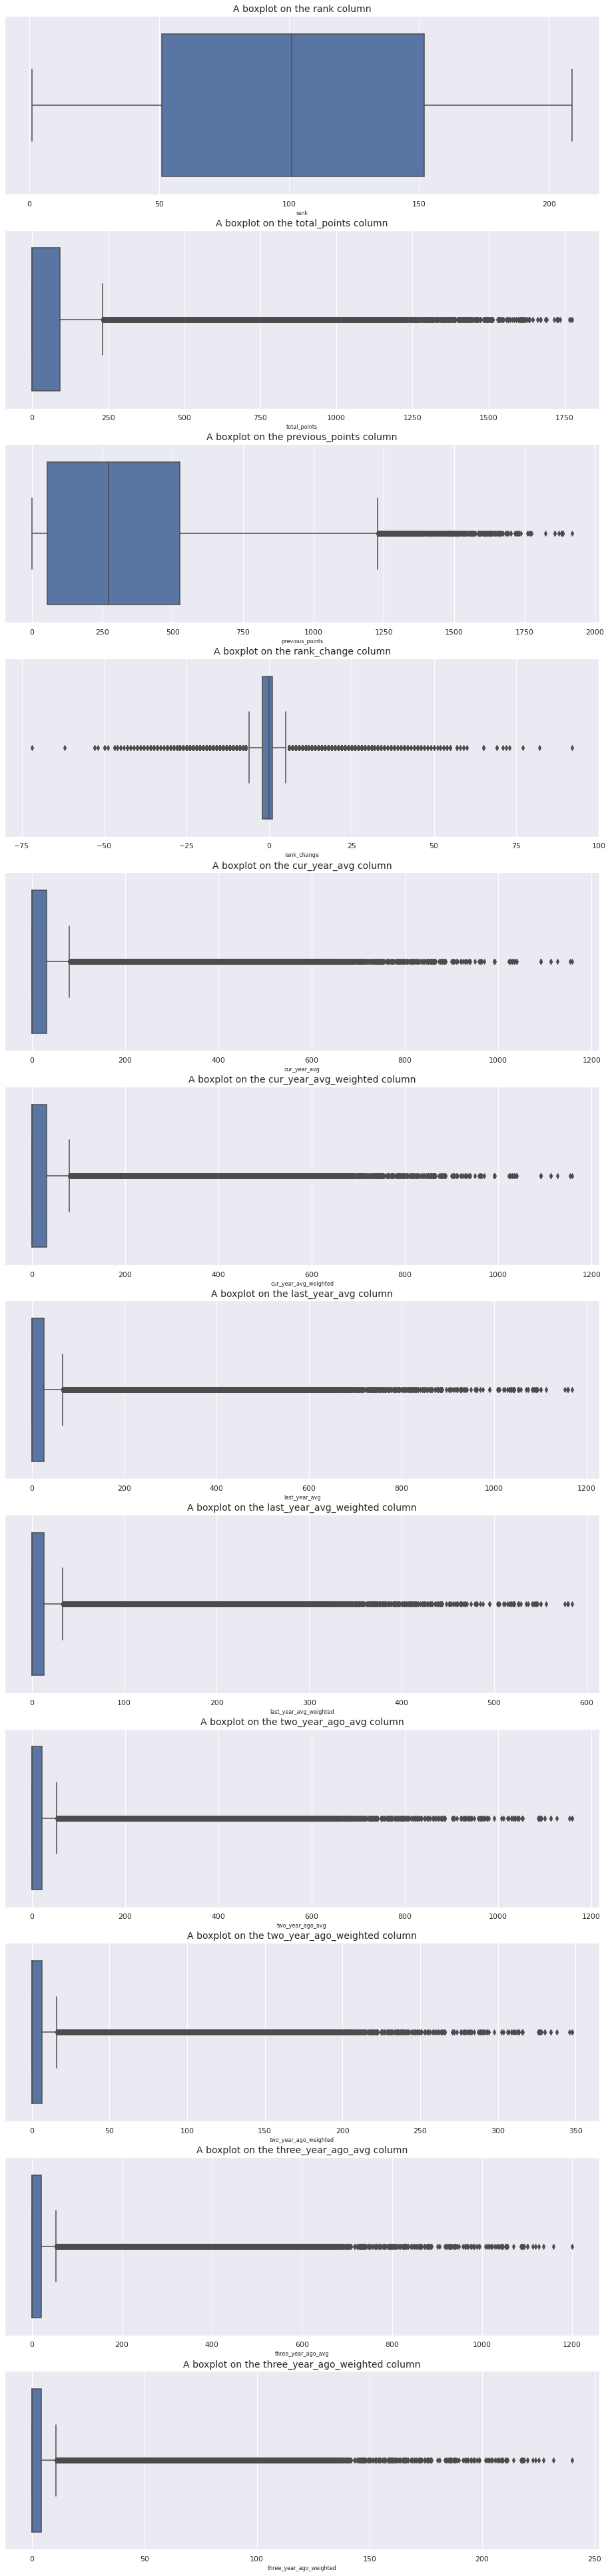

In [581]:
# Checking for Outliers


col_names = ['rank', 'total_points',
       'previous_points', 'rank_change', 'cur_year_avg',
       'cur_year_avg_weighted', 'last_year_avg', 'last_year_avg_weighted',
       'two_year_ago_avg', 'two_year_ago_weighted', 'three_year_ago_avg',
       'three_year_ago_weighted']
fig, ax = plt.subplots(len(col_names), figsize = (16,70))
for i, col_val in enumerate(col_names):

    sns.boxplot(x = fifa[col_val], ax=ax[i])
    ax[i].set_title('A boxplot on the {} column'.format(col_val), fontsize=14)
    ax[i].set_xlabel(col_val, fontsize=8)
plt.show()

In [582]:
#There seems to be very many outliers but lets count them to be sure

df1 = fifa[['rank', 'total_points',
       'previous_points', 'rank_change', 'cur_year_avg',
       'cur_year_avg_weighted', 'last_year_avg', 'last_year_avg_weighted',
       'two_year_ago_avg', 'two_year_ago_weighted', 'three_year_ago_avg', 'three_year_ago_weighted']]
Q1 = df1.quantile(0.25)
Q3 = df1.quantile(0.75)
IQR = Q3 - Q1
((df1 < (Q1 - 1.5 * IQR)) | (df1 > (Q3 + 1.5 * IQR))).sum()


rank                           0
total_points               10952
previous_points              754
rank_change                 8359
cur_year_avg               12195
cur_year_avg_weighted      12195
last_year_avg              12674
last_year_avg_weighted     12681
two_year_ago_avg           13047
two_year_ago_weighted      13051
three_year_ago_avg         12918
three_year_ago_weighted    12918
dtype: int64

In [583]:
fifa.columns

Index(['rank', 'country_full', 'country_abrv', 'total_points',
       'previous_points', 'rank_change', 'cur_year_avg',
       'cur_year_avg_weighted', 'last_year_avg', 'last_year_avg_weighted',
       'two_year_ago_avg', 'two_year_ago_weighted', 'three_year_ago_avg',
       'three_year_ago_weighted', 'confederation', 'rank_date'],
      dtype='object')

In [584]:
fifa = fifa[validate_country(fifa["country_full"])]

In [585]:
# Checking for Anomalies
#
#Selecting the categorical columns
cat_cols = ['country_full', 'country_abrv', 'confederation']
cat_cols
#We can expect to see 500 different entries for email and address columns - I doubt they will be of use on our analysis. we may have to drop them
#We can expect to see atleast 130 entries for avatars, this could be an indication of how the customer percieves themselves and may affect purchasing habits

# Check for unique values in each column
for col in cat_cols:
  print(f'{col} column unique values: \n')
  print(fifa[col].unique(), end='\n')
  print('............................................................................')
  print('\n')

country_full column unique values: 

['Germany' 'Italy' 'Switzerland' 'Sweden' 'Argentina' 'Russia' 'Brazil'
 'Norway' 'Denmark' 'France' 'Spain' 'Mexico' 'Netherlands' 'Nigeria'
 'Belgium' 'Colombia' 'Poland' 'Romania' 'Uruguay' 'Portugal' 'Cameroon'
 'Zambia' 'Egypt' 'USA' 'Tunisia' 'Greece' 'Morocco' 'Algeria' 'Ecuador'
 'Bulgaria' 'Austria' 'Costa Rica' 'Honduras' 'Hungary' 'Japan'
 'Saudi Arabia' 'Canada' 'Finland' 'Ghana' 'Chile' 'Zimbabwe' 'Qatar'
 'Australia' 'Iceland' 'United Arab Emirates' 'Iraq' 'Senegal' 'Bolivia'
 'Kuwait' 'El Salvador' 'Turkey' 'Gabon' 'Guinea' 'Thailand' 'Paraguay'
 'Malawi' 'Israel' 'Peru' 'Cyprus' 'Singapore' 'Mali' 'Malaysia' 'Bermuda'
 'Niger' 'Syria' 'Bahrain' 'New Zealand' 'Madagascar' 'Malta' 'Jamaica'
 'Lithuania' 'Trinidad and Tobago' 'Sierra Leone' 'Jordan' 'Kenya'
 'Latvia' 'Yemen' 'Tanzania' 'Albania' 'Angola' 'Venezuela' 'Ethiopia'
 'Burundi' 'Oman' 'Indonesia' 'Liberia' 'Mozambique' 'Puerto Rico'
 'Hong Kong' 'Uganda' 'Barbados' 'Myanmar' '

In [586]:
# Identifying the Missing Data
#
fifa.isnull().sum()

rank                       0
country_full               0
country_abrv               0
total_points               0
previous_points            0
rank_change                0
cur_year_avg               0
cur_year_avg_weighted      0
last_year_avg              0
last_year_avg_weighted     0
two_year_ago_avg           0
two_year_ago_weighted      0
three_year_ago_avg         0
three_year_ago_weighted    0
confederation              0
rank_date                  0
dtype: int64

In [587]:
# Dealing with the Missing Data
#
# There are no missing values so we  can proceed

In [588]:
# Identifying the duplicate Data

len(fifa)-len(fifa.drop_duplicates())

37

In [589]:
# Dealing with the Duplicate Data
# They are few entries that are duplicates so we can procceed to drop them
fifa = fifa.drop_duplicates()

In [590]:
fifa.columns

Index(['rank', 'country_full', 'country_abrv', 'total_points',
       'previous_points', 'rank_change', 'cur_year_avg',
       'cur_year_avg_weighted', 'last_year_avg', 'last_year_avg_weighted',
       'two_year_ago_avg', 'two_year_ago_weighted', 'three_year_ago_avg',
       'three_year_ago_weighted', 'confederation', 'rank_date'],
      dtype='object')

In [591]:
# More data cleaning procedures
#We found that we will not use the full country names. Its easier to work with abbreviations and address information. so we will drop them here below

fifa = fifa.drop(columns=['country_abrv'])

# we will be using the avatar column so we will encode it here
#Encoding columns



#we found that we had very many outliers so we will not be dropping them. - They will affect our analysis
#don't drop outliers

# We founf that the rank date column has been recognized as an object so we will change it to datetime datatype

fifa['rank_date'] = pd.to_datetime(fifa['rank_date'])


In [592]:
#Lets check the time period that our fifa dataset runs through
fifa.rank_date.dt.year.unique()

array([1993, 1994, 1995, 1996, 1997, 1998, 1999, 2000, 2001, 2002, 2003,
       2004, 2005, 2006, 2007, 2008, 2009, 2010, 2011, 2012, 2013, 2014,
       2015, 2016, 2017, 2018])

Runs between 1993 - 2018

In [593]:
#Standardizing column names

fifa.columns = fifa.columns.str.strip().str.lower().str.replace(' ', '_').str.replace('(', '').str.replace(')', '')

In [594]:
fifa.columns

Index(['rank', 'country_full', 'total_points', 'previous_points',
       'rank_change', 'cur_year_avg', 'cur_year_avg_weighted', 'last_year_avg',
       'last_year_avg_weighted', 'two_year_ago_avg', 'two_year_ago_weighted',
       'three_year_ago_avg', 'three_year_ago_weighted', 'confederation',
       'rank_date'],
      dtype='object')

In [595]:
fifa.shape

(51105, 15)

###*Results dataset*

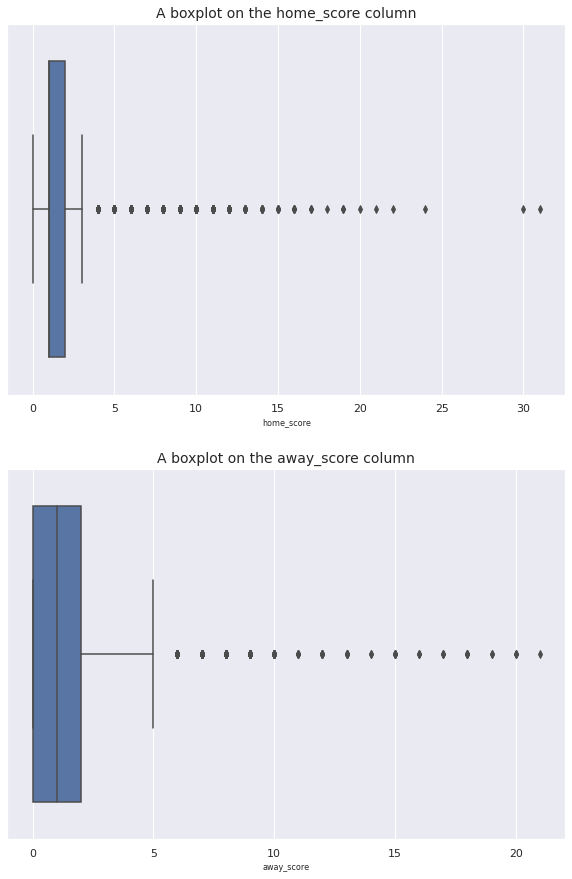

In [596]:
# Checking for Outliers


col_names = ['home_score', 'away_score']
fig, ax = plt.subplots(len(col_names), figsize = (10,15))
for i, col_val in enumerate(col_names):

    sns.boxplot(x = results[col_val], ax=ax[i])
    ax[i].set_title('A boxplot on the {} column'.format(col_val), fontsize=14)
    ax[i].set_xlabel(col_val, fontsize=8)
plt.show()

In [597]:
#There seems to be very many outliers but lets count them to be sure

df1 = results[['home_score', 'away_score']]
Q1 = df1.quantile(0.25)
Q3 = df1.quantile(0.75)
IQR = Q3 - Q1
((df1 < (Q1 - 1.5 * IQR)) | (df1 > (Q3 + 1.5 * IQR))).sum()


home_score    5124
away_score     570
dtype: int64

In [598]:
# Cleaning country names

results = results[validate_country(results["country"])]

In [599]:
# Checking for Anomalies
#
#Selecting the categorical columns
cat_cols = ['home_team', 'away_team', 'tournament', 'city', 'country', 'neutral']
cat_cols
#We can expect to see 500 different entries for email and address columns - I doubt they will be of use on our analysis. we may have to drop them
#We can expect to see atleast 130 entries for avatars, this could be an indication of how the customer percieves themselves and may affect purchasing habits

# Check for unique values in each column
for col in cat_cols:
  print(f'{col} column unique values: \n')
  print(results[col].unique(), end='\n')
  print('............................................................................')
  print('\n')

home_team column unique values: 

['United States' 'Uruguay' 'Austria' 'Hungary' 'Argentina' 'Belgium'
 'France' 'Netherlands' 'Switzerland' 'Sweden' 'Germany' 'Italy' 'Chile'
 'Norway' 'Finland' 'Luxembourg' 'Russia' 'Denmark' 'Catalonia'
 'Basque Country' 'Brazil' 'Japan' 'Paraguay' 'Canada' 'Estonia'
 'Costa Rica' 'Guatemala' 'Spain' 'Brittany' 'Poland' 'New Zealand'
 'Romania' 'Latvia' 'Galicia' 'Portugal' 'Andalusia' 'China PR'
 'Australia' 'Lithuania' 'Turkey' 'Central Spain' 'Mexico' 'Aruba' 'Egypt'
 'Haiti' 'Philippines' 'Bulgaria' 'Jamaica' 'Kenya' 'Czechoslovakia'
 'Bolivia' 'Peru' 'Honduras' 'Uganda' 'El Salvador' 'Barbados'
 'Trinidad and Tobago' 'Greece' 'Dominica' 'Guyana' 'Silesia' 'Guadeloupe'
 'Israel' 'French Guiana' 'Cuba' 'Colombia' 'Ecuador'
 'Saint Kitts and Nevis' 'Panama' 'Slovakia' 'Croatia' 'Curaçao'
 'Nicaragua' 'Afghanistan' 'India' 'Martinique' 'Iceland' 'Albania'
 'Madagascar' 'Mauritius' 'Iran' 'Suriname' 'Vietnam' 'Macau' 'Ethiopia'
 'Puerto Rico' 'Sierr

In [600]:
# Identifying the Missing Data
#
results.isnull().sum()

date          0
home_team     0
away_team     0
home_score    0
away_score    0
tournament    0
city          0
country       0
neutral       0
dtype: int64

In [601]:
# Dealing with the Missing Data
#
# There are no missing values so we  can proceed

In [602]:
# Identifying the duplicate Data

len(results)-len(results.drop_duplicates())

0

In [603]:
# Dealing with the Duplicate Data
# There are no duplicate records so we can proceed

In [604]:
# More data cleaning procedures
#We have not found any unnecessary columns as of now but we will come back to review

#results = results.drop(columns=['country_full'])

# we will be using the avatar column so we will encode it here
#Encoding columns

results['neutral']=lb.fit_transform(results['neutral'].astype(str))


#we found that we had very many outliers so we will not be dropping them. - They will affect our analysis
#don't drop outliers

# We founf that the rank date column has been recognized as an object so we will change it to datetime datatype

results['date'] = pd.to_datetime(results['date'])


In [605]:
#Lets check the time period that our fifa dataset runs through
results.date.dt.year.unique()

array([1885, 1886, 1902, 1903, 1904, 1905, 1906, 1907, 1908, 1909, 1910,
       1911, 1912, 1913, 1914, 1915, 1916, 1917, 1918, 1919, 1920, 1921,
       1922, 1923, 1924, 1925, 1926, 1927, 1928, 1929, 1930, 1931, 1932,
       1933, 1934, 1935, 1936, 1937, 1938, 1939, 1940, 1941, 1942, 1943,
       1944, 1945, 1946, 1947, 1948, 1949, 1950, 1951, 1952, 1953, 1954,
       1955, 1956, 1957, 1958, 1959, 1960, 1961, 1962, 1963, 1964, 1965,
       1966, 1967, 1968, 1969, 1970, 1971, 1972, 1973, 1974, 1975, 1976,
       1977, 1978, 1979, 1980, 1981, 1982, 1983, 1984, 1985, 1986, 1987,
       1988, 1989, 1990, 1991, 1992, 1993, 1994, 1995, 1996, 1997, 1998,
       1999, 2000, 2001, 2002, 2003, 2004, 2005, 2006, 2007, 2008, 2009,
       2010, 2011, 2012, 2013, 2014, 2015, 2016, 2017, 2018, 2019])

Runs from 1872 - 2019

In [606]:
#Standardizing column names

results.columns = results.columns.str.strip().str.lower().str.replace(' ', '_').str.replace('(', '').str.replace(')', '')

In [607]:
results.shape

(36338, 9)

## 6. Merging the Datasets

In [608]:
#Since the fifa dataset runs from 1993 -2018 and the results dataset runs from 1872 - 2019
#We will drop all records not within 1993 to 2018

#FIFA DATASET
fifa = fifa[fifa.rank_date.dt.year > 1993]
fifa = fifa[fifa.rank_date.dt.year < 2018]

#RESULTS DATASET

results = results[results.date.dt.year > 1993]
results = results[results.date.dt.year < 2018]

print('fifa shape: ',fifa.shape)
print('results: ', results.shape)



fifa shape:  (49252, 15)
results:  (19841, 9)


In [609]:
results.columns

Index(['date', 'home_team', 'away_team', 'home_score', 'away_score',
       'tournament', 'city', 'country', 'neutral'],
      dtype='object')

In [610]:
#In order to merge the datasets, we will merge them on the year and month and country full  columns
#Therefore we will extract the year and month from the results dataset
results['year'] = pd.DatetimeIndex(results['date']).year
results['month'] = pd.DatetimeIndex(results['date']).month


results.drop(['date'],axis=1,inplace=True)
results.groupby(['home_team', 'away_team', 'tournament',
       'city', 'country'], as_index=False).mean()[['home_team', 'away_team', 'home_score', 'away_score', 'tournament',
       'city', 'country', 'neutral', 'year', 'month']]

,home_team,away_team,home_score,away_score,tournament,city,country,neutral,year,month
0,Abkhazia,Artsakh,1.0,1.0,Friendly,Sukhumi,Georgia,0.0,2012.0,9.0
1,Abkhazia,Chagos Islands,9.0,0.0,CONIFA World Football Cup,Suhkumi,Georgia,0.0,2016.0,5.0
2,Abkhazia,Northern Cyprus,2.0,0.0,CONIFA World Football Cup,Suhkumi,Georgia,0.0,2016.0,6.0
3,Abkhazia,Occitania,0.5,1.0,CONIFA World Football Cup,Östersund,Sweden,1.0,2014.0,6.0
4,Abkhazia,Panjab,1.0,1.0,CONIFA World Football Cup,Suhkumi,Georgia,0.0,2016.0,6.0
...,...,...,...,...,...,...,...,...,...,...
16624,Åland Islands,Menorca,1.0,1.0,Island Games,Finström,Sweden,0.0,2009.0,6.0
16625,Åland Islands,Menorca,1.0,3.0,Island Games,St. Clement,Jersey,1.0,2015.0,6.0
16626,Åland Islands,Saare County,0.0,0.0,Island Games,Fardhem,Sweden,1.0,2017.0,6.0
16627,Åland Islands,Shetland,2.0,1.0,Island Games,Hammarland,Sweden,0.0,2009.0,6.0


In [611]:
fifa.columns

Index(['rank', 'country_full', 'total_points', 'previous_points',
       'rank_change', 'cur_year_avg', 'cur_year_avg_weighted', 'last_year_avg',
       'last_year_avg_weighted', 'two_year_ago_avg', 'two_year_ago_weighted',
       'three_year_ago_avg', 'three_year_ago_weighted', 'confederation',
       'rank_date'],
      dtype='object')

In [612]:
#In order to merge the datasets, we will merge them on the year and month and country full columns
#Therefore we will extract the year and month from the fifa dataset
fifa['year'] = pd.DatetimeIndex(fifa['rank_date']).year
fifa['month'] = pd.DatetimeIndex(fifa['rank_date']).month

fifa.drop(['rank_date'],axis=1,inplace=True)

fifa.groupby(['rank', 'country_full', 'confederation',
       ], as_index=False).mean()[['rank', 'country_full', 'total_points', 'previous_points',
       'rank_change', 'cur_year_avg', 'cur_year_avg_weighted', 'last_year_avg',
       'last_year_avg_weighted', 'two_year_ago_avg', 'two_year_ago_weighted',
       'three_year_ago_avg', 'three_year_ago_weighted', 'confederation',
       'year', 'month']]

,rank,country_full,total_points,previous_points,rank_change,cur_year_avg,cur_year_avg_weighted,last_year_avg,last_year_avg_weighted,two_year_ago_avg,two_year_ago_weighted,three_year_ago_avg,three_year_ago_weighted,confederation,year,month
0,1,Argentina,959.333462,1539.807692,0.230769,489.396538,489.396538,483.903077,241.951538,499.185000,149.756923,391.153846,78.230769,CONMEBOL,2012.730769,6.500000
1,1,Belgium,1485.298000,1461.800000,0.400000,756.968000,756.968000,834.850000,417.430000,669.686000,200.908000,549.992000,109.996000,UEFA,2015.600000,5.800000
2,1,Brazil,47.175816,670.276596,0.092199,28.691064,28.691064,15.724326,7.862128,20.841986,6.252624,21.850638,4.370213,CONMEBOL,2001.255319,6.787234
3,1,France,0.000000,808.846154,0.076923,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,UEFA,2001.384615,6.384615
4,1,Germany,1438.408500,1415.800000,0.250000,872.276500,872.276500,515.821000,257.912500,606.387000,181.917000,631.519000,126.304500,UEFA,2012.050000,6.900000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
12309,208,Bahamas,0.000000,4.333333,-2.666667,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,CONCACAF,2015.000000,9.000000
12310,208,Bhutan,0.000000,0.000000,-0.250000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,AFC,2014.000000,8.500000
12311,208,San Marino,0.000000,0.000000,-0.250000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,UEFA,2014.000000,8.500000
12312,209,Anguilla,1.320000,2.000000,-0.250000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,CONCACAF,2015.000000,5.500000


In [613]:
#creating a new column called results that is computed by the home score - the away score
#We will use this column to determine the win/loss/draw status of each game

results['result'] = results['home_score'] - results['away_score']

def result(x):
  if x >0:
    return 'win'
  elif x<0:
    return 'loss'
  else:
    return 'draw'

results['results']=results.result.apply(lambda x: result(x))

results.head()

,home_team,away_team,home_score,away_score,tournament,city,country,neutral,year,month,result,results
18094,Barbados,Grenada,0,0,Friendly,Bridgetown,Barbados,0,1994,1,0,draw
18095,Ghana,Egypt,2,1,Friendly,Accra,Ghana,0,1994,1,1,win
18096,Mali,Burkina Faso,1,1,Friendly,Bamako,Mali,0,1994,1,0,draw
18097,Mauritania,Mali,1,3,Friendly,Nouakchott,Mauritania,0,1994,1,-2,loss
18098,Thailand,Nigeria,1,1,Friendly,Bangkok,Thailand,0,1994,1,0,draw


In [614]:
home = pd.merge(fifa,results, how = 'inner', left_on = ['year','month','country_full'], right_on = ['year','month','home_team'])
home.head()

#merge with country?

,rank,country_full,total_points,previous_points,rank_change,cur_year_avg,cur_year_avg_weighted,last_year_avg,last_year_avg_weighted,two_year_ago_avg,two_year_ago_weighted,three_year_ago_avg,three_year_ago_weighted,confederation,year,month,home_team,away_team,home_score,away_score,tournament,city,country,neutral,result,results
0,6,Spain,0.0,57,-1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,UEFA,1994,2,Spain,Poland,1,1,Friendly,Santa Cruz de Tenerife,Spain,0,0,draw
1,7,Italy,0.0,59,-5,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,UEFA,1994,2,Italy,France,0,1,Friendly,Naples,Italy,0,-1,loss
2,17,Mexico,0.0,51,-1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,CONCACAF,1994,2,Mexico,Russia,1,4,Friendly,Oakland,United States,1,-3,loss
3,17,Mexico,0.0,51,-1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,CONCACAF,1994,2,Mexico,Sweden,2,1,Friendly,Fresno,United States,1,1,win
4,18,Romania,0.0,52,-5,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,UEFA,1994,2,Romania,United States,2,1,Lunar New Year Cup,Kowloon,Hong Kong,1,1,win


In [615]:
#Cause of the merging, secondary data cleaning may required. 

# Drop unnecessary columns
home.drop(columns = ['total_points', 'previous_points', 'rank_change', 
                        'cur_year_avg', 'cur_year_avg_weighted', 'last_year_avg', 'last_year_avg_weighted',
                        'two_year_ago_avg', 'two_year_ago_weighted', 'three_year_ago_avg', 
                        'three_year_ago_weighted'], axis = 1, inplace = True)
home.rename(columns={'rank':'home_rank'}, inplace = True)
home
#checking for duplicates
x =home.shape
print('initial shape',x)
x = len(home)-len(home.drop_duplicates())
print('There are ', x, 'duplicates')
#dropping duplicates

home = home.drop_duplicates()

#checking for null values


x = home.isnull().sum()
print('Null rows''\n', x)
#dropping null values

home.dropna()

#Confirm data types
z = home.info()
y = home.shape
print('shape',y)
print('info',z)



initial shape (16936, 15)
There are  27 duplicates
Null rows
 home_rank        0
country_full     0
confederation    0
year             0
month            0
home_team        0
away_team        0
home_score       0
away_score       0
tournament       0
city             0
country          0
neutral          0
result           0
results          0
dtype: int64
<class 'pandas.core.frame.DataFrame'>
Int64Index: 16909 entries, 0 to 16935
Data columns (total 15 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   home_rank      16909 non-null  int64 
 1   country_full   16909 non-null  object
 2   confederation  16909 non-null  object
 3   year           16909 non-null  int64 
 4   month          16909 non-null  int64 
 5   home_team      16909 non-null  object
 6   away_team      16909 non-null  object
 7   home_score     16909 non-null  int64 
 8   away_score     16909 non-null  int64 
 9   tournament     16909 non-null  object
 10  city      

In [616]:

away = pd.merge(fifa, results, how = 'inner', left_on = ['year', 'month','country_full'], 
                     right_on = ['year', 'month','away_team'])
away.head()

,rank,country_full,total_points,previous_points,rank_change,cur_year_avg,cur_year_avg_weighted,last_year_avg,last_year_avg_weighted,two_year_ago_avg,two_year_ago_weighted,three_year_ago_avg,three_year_ago_weighted,confederation,year,month,home_team,away_team,home_score,away_score,tournament,city,country,neutral,result,results
0,10,Sweden,0.0,54,-1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,UEFA,1994,2,Colombia,Sweden,0,0,Friendly,Miami,United States,1,0,draw
1,10,Sweden,0.0,54,-1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,UEFA,1994,2,United States,Sweden,1,3,Friendly,Miami,United States,0,-2,loss
2,10,Sweden,0.0,54,-1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,UEFA,1994,2,Mexico,Sweden,2,1,Friendly,Fresno,United States,1,1,win
3,13,Russia,0.0,52,1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,UEFA,1994,2,Mexico,Russia,1,4,Friendly,Oakland,United States,1,-3,loss
4,14,France,0.0,51,1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,UEFA,1994,2,Italy,France,0,1,Friendly,Naples,Italy,0,-1,loss


In [617]:
#Cause of the merging, secondary data cleaning may required. 

# Drop unnecessary columns
away.drop(columns = ['total_points', 'previous_points', 'rank_change', 
                        'cur_year_avg', 'cur_year_avg_weighted', 'last_year_avg', 'last_year_avg_weighted',
                        'two_year_ago_avg', 'two_year_ago_weighted', 'three_year_ago_avg', 
                        'three_year_ago_weighted'], axis = 1, inplace = True)
away.rename(columns={'rank':'away_rank'}, inplace = True)
away
#checking for duplicates
x =away.shape
print('initial shape',x)
x = len(away)-len(away.drop_duplicates())
print('There are ', x, 'duplicates')
#dropping duplicates

away = away.drop_duplicates()

#checking for null values


x = away.isnull().sum()
print('Null rows''\n', x)
#dropping null values

home.dropna()

#Confirm data types
z = away.info()
y = away.shape
print('shape',y)
print('info',z)



initial shape (15910, 15)
There are  26 duplicates
Null rows
 away_rank        0
country_full     0
confederation    0
year             0
month            0
home_team        0
away_team        0
home_score       0
away_score       0
tournament       0
city             0
country          0
neutral          0
result           0
results          0
dtype: int64
<class 'pandas.core.frame.DataFrame'>
Int64Index: 15884 entries, 0 to 15909
Data columns (total 15 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   away_rank      15884 non-null  int64 
 1   country_full   15884 non-null  object
 2   confederation  15884 non-null  object
 3   year           15884 non-null  int64 
 4   month          15884 non-null  int64 
 5   home_team      15884 non-null  object
 6   away_team      15884 non-null  object
 7   home_score     15884 non-null  int64 
 8   away_score     15884 non-null  int64 
 9   tournament     15884 non-null  object
 10  city      

In [618]:
results.columns

Index(['home_team', 'away_team', 'home_score', 'away_score', 'tournament',
       'city', 'country', 'neutral', 'year', 'month', 'result', 'results'],
      dtype='object')

In [619]:
# #merging datasets

df = pd.merge(home, away, how='inner', left_on=['year','month', 'away_team', 'home_score', 'away_score', 'home_team', 'tournament', 'city', 'country'], right_on=['year','month', 'away_team', 'home_score', 'away_score', 'home_team', 'tournament', 'city' , 'country'])

df.sample(10)

,home_rank,country_full_x,confederation_x,year,month,home_team,away_team,home_score,away_score,tournament,city,country,neutral_x,result_x,results_x,away_rank,country_full_y,confederation_y,neutral_y,result_y,results_y
8487,104,Haiti,CONCACAF,2008,10,Haiti,El Salvador,0,0,FIFA World Cup qualification,Port-au-Prince,Haiti,0,0,draw,120,El Salvador,CONCACAF,0,0,draw
14444,25,Sweden,UEFA,2017,10,Sweden,Luxembourg,8,0,FIFA World Cup qualification,Solna,Sweden,0,8,win,93,Luxembourg,UEFA,0,8,win
14320,10,France,UEFA,2017,8,France,Netherlands,4,0,FIFA World Cup qualification,Saint-Denis,France,0,4,win,36,Netherlands,UEFA,0,4,win
1666,68,El Salvador,CONCACAF,1997,11,El Salvador,Jamaica,2,2,FIFA World Cup qualification,San Salvador,El Salvador,0,0,draw,39,Jamaica,CONCACAF,0,0,draw
3871,25,South Africa,CAF,2001,7,South Africa,Malawi,2,0,FIFA World Cup qualification,Durban,South Africa,0,2,win,120,Malawi,CAF,0,2,win
9684,175,British Virgin Islands,CONCACAF,2010,10,British Virgin Islands,Dominica,0,10,CFU Caribbean Cup qualification,San Cristóbal,Dominican Republic,1,-10,loss,132,Dominica,CONCACAF,1,-10,loss
7917,134,Malta,UEFA,2008,2,Malta,Belarus,0,1,Malta International Tournament,Attard,Malta,0,-1,loss,62,Belarus,UEFA,0,-1,loss
4973,38,Russia,UEFA,2003,8,Russia,Israel,1,2,Friendly,Moscow,Russia,0,-1,loss,42,Israel,UEFA,0,-1,loss
3437,82,Guinea,CAF,2001,1,Guinea,Malawi,1,1,FIFA World Cup qualification,Conakry,Guinea,0,0,draw,114,Malawi,CAF,0,0,draw
5489,73,Austria,UEFA,2004,5,Austria,Russia,0,0,Friendly,Graz,Austria,0,0,draw,30,Russia,UEFA,0,0,draw


In [620]:
df.shape


(14621, 21)

In [621]:
#Cause of the merging, secondary data cleaning may required. 

# Drop unnecessary columns
df.drop(columns = ['country_full_y', 'confederation_y', 'neutral_y',
       'result_y', 'results_y'], axis = 1, inplace = True)
#checking for duplicates
x =df.shape
print('initial shape',x)
x = len(df)-len(df.drop_duplicates())
print('There are ', x, 'duplicates')
#dropping duplicates

df = df.drop_duplicates()

#checking for null values


x = df.isnull().sum()
print('Null rows''\n', x)
#dropping null values

df.dropna()

#Confirm data types
z = df.info()
y = df.shape
print('shape',y)
print('info',z)



initial shape (14621, 16)
There are  0 duplicates
Null rows
 home_rank          0
country_full_x     0
confederation_x    0
year               0
month              0
home_team          0
away_team          0
home_score         0
away_score         0
tournament         0
city               0
country            0
neutral_x          0
result_x           0
results_x          0
away_rank          0
dtype: int64
<class 'pandas.core.frame.DataFrame'>
Int64Index: 14621 entries, 0 to 14620
Data columns (total 16 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   home_rank        14621 non-null  int64 
 1   country_full_x   14621 non-null  object
 2   confederation_x  14621 non-null  object
 3   year             14621 non-null  int64 
 4   month            14621 non-null  int64 
 5   home_team        14621 non-null  object
 6   away_team        14621 non-null  object
 7   home_score       14621 non-null  int64 
 8   away_score       14621 non

In [622]:
df.columns

Index(['home_rank', 'country_full_x', 'confederation_x', 'year', 'month',
       'home_team', 'away_team', 'home_score', 'away_score', 'tournament',
       'city', 'country', 'neutral_x', 'result_x', 'results_x', 'away_rank'],
      dtype='object')

In [623]:
df.rename(columns={'country_full_x':'country_full', 'Confederation_x': 'Confederation', 'neutral_x':'neutral','result_x':'result', 'results_x':'results' }, inplace=True)

In [624]:
home.shape

(16909, 15)

In [625]:
away.shape

(15884, 15)

In [626]:
df.shape

(14621, 16)

In [627]:
home.head()

,home_rank,country_full,confederation,year,month,home_team,away_team,home_score,away_score,tournament,city,country,neutral,result,results
0,6,Spain,UEFA,1994,2,Spain,Poland,1,1,Friendly,Santa Cruz de Tenerife,Spain,0,0,draw
1,7,Italy,UEFA,1994,2,Italy,France,0,1,Friendly,Naples,Italy,0,-1,loss
2,17,Mexico,CONCACAF,1994,2,Mexico,Russia,1,4,Friendly,Oakland,United States,1,-3,loss
3,17,Mexico,CONCACAF,1994,2,Mexico,Sweden,2,1,Friendly,Fresno,United States,1,1,win
4,18,Romania,UEFA,1994,2,Romania,United States,2,1,Lunar New Year Cup,Kowloon,Hong Kong,1,1,win


In [628]:
away.head()

,away_rank,country_full,confederation,year,month,home_team,away_team,home_score,away_score,tournament,city,country,neutral,result,results
0,10,Sweden,UEFA,1994,2,Colombia,Sweden,0,0,Friendly,Miami,United States,1,0,draw
1,10,Sweden,UEFA,1994,2,United States,Sweden,1,3,Friendly,Miami,United States,0,-2,loss
2,10,Sweden,UEFA,1994,2,Mexico,Sweden,2,1,Friendly,Fresno,United States,1,1,win
3,13,Russia,UEFA,1994,2,Mexico,Russia,1,4,Friendly,Oakland,United States,1,-3,loss
4,14,France,UEFA,1994,2,Italy,France,0,1,Friendly,Naples,Italy,0,-1,loss


In [629]:
df.head()

,home_rank,country_full,confederation_x,year,month,home_team,away_team,home_score,away_score,tournament,city,country,neutral,result,results,away_rank
0,6,Spain,UEFA,1994,2,Spain,Poland,1,1,Friendly,Santa Cruz de Tenerife,Spain,0,0,draw,24
1,7,Italy,UEFA,1994,2,Italy,France,0,1,Friendly,Naples,Italy,0,-1,loss,14
2,17,Mexico,CONCACAF,1994,2,Mexico,Russia,1,4,Friendly,Oakland,United States,1,-3,loss,13
3,17,Mexico,CONCACAF,1994,2,Mexico,Sweden,2,1,Friendly,Fresno,United States,1,1,win,10
4,20,Colombia,CONMEBOL,1994,2,Colombia,Sweden,0,0,Friendly,Miami,United States,1,0,draw,10


## 7. Exploratory Analysis

###Measures of central tendancy


####Home

In [630]:
#getting summary
home.describe(include='all')

,home_rank,country_full,confederation,year,month,home_team,away_team,home_score,away_score,tournament,city,country,neutral,result,results
count,16909.000000,16909,16909,16909.000000,16909.000000,16909,16909,16909.000000,16909.000000,16909,16909,16909,16909.000000,16909.000000,16909
unique,NaN,182,6,NaN,NaN,182,233,NaN,NaN,63,1289,192,NaN,NaN,3
top,NaN,Mexico,UEFA,NaN,NaN,Mexico,Zambia,NaN,NaN,Friendly,Doha,United States,NaN,NaN,win
freq,NaN,259,5129,NaN,NaN,259,180,NaN,NaN,6238,278,587,NaN,NaN,8195
mean,78.739547,NaN,NaN,2006.365900,6.912887,NaN,NaN,1.630907,1.073984,NaN,NaN,NaN,0.239281,0.556922,NaN
std,51.398950,NaN,NaN,6.600496,3.297280,NaN,NaN,1.662062,1.254244,NaN,NaN,NaN,0.426657,2.237343,NaN
min,1.000000,NaN,NaN,1994.000000,1.000000,NaN,NaN,0.000000,0.000000,NaN,NaN,NaN,0.000000,-17.000000,NaN
25%,35.000000,NaN,NaN,2001.000000,4.000000,NaN,NaN,0.000000,0.000000,NaN,NaN,NaN,0.000000,-1.000000,NaN
50%,74.000000,NaN,NaN,2007.000000,7.000000,NaN,NaN,1.000000,1.000000,NaN,NaN,NaN,0.000000,0.000000,NaN
75%,115.000000,NaN,NaN,2012.000000,10.000000,NaN,NaN,2.000000,2.000000,NaN,NaN,NaN,0.000000,2.000000,NaN


In [631]:
home.columns

Index(['home_rank', 'country_full', 'confederation', 'year', 'month',
       'home_team', 'away_team', 'home_score', 'away_score', 'tournament',
       'city', 'country', 'neutral', 'result', 'results'],
      dtype='object')

In [632]:
# Mode
# Calculating mode across different columns

a = home[['home_team', 'away_team', 'home_score', 'away_score', 'tournament',
       'city', 'country', 'neutral', 'year', 'month','result', 'results']].mode().head(1)

arr = a.to_numpy()
arr


array([['Mexico', 'Zambia', 1, 0, 'Friendly', 'Doha', 'United States', 0,
        2008, 6, 0, 'win']], dtype=object)

In [633]:
modehome =pd.DataFrame()
modehome

data = {'Criteria': ['home_team', 'away_team', 'home_score', 'away_score', 'tournament',
       'city', 'country', 'neutral', 'year',  'month','result', 'results'], 
       'The most appearing record': ['United States', 'Zambia', 1, 0, 'Friendly', 'Doha',
        'United States', 0, 2008, 6, 0, 'win']} 
modehome =pd.DataFrame(data)
modehome

,Criteria,The most appearing record
0,home_team,United States
1,away_team,Zambia
2,home_score,1
3,away_score,0
4,tournament,Friendly
5,city,Doha
6,country,United States
7,neutral,0
8,year,2008
9,month,6


In [634]:
# Mean

# Calculating mean across different columns

a = home.mean()

a

home_rank       78.739547
year          2006.365900
month            6.912887
home_score       1.630907
away_score       1.073984
neutral          0.239281
result           0.556922
dtype: float64

In [635]:
# Median
# Calculating the median for across different columns

a = home.median()

a

home_rank       74.0
year          2007.0
month            7.0
home_score       1.0
away_score       1.0
neutral          0.0
result           0.0
dtype: float64

####Away


In [636]:
#getting summary
away.describe(include='all')

,away_rank,country_full,confederation,year,month,home_team,away_team,home_score,away_score,tournament,city,country,neutral,result,results
count,15884.000000,15884,15884,15884.000000,15884.000000,15884,15884,15884.000000,15884.000000,15884,15884,15884,15884.000000,15884.000000,15884
unique,NaN,182,6,NaN,NaN,231,182,NaN,NaN,63,1290,200,NaN,NaN,3
top,NaN,Zambia,UEFA,NaN,NaN,Mexico,Zambia,NaN,NaN,Friendly,Doha,United States,NaN,NaN,win
freq,NaN,194,4509,NaN,NaN,229,194,NaN,NaN,5946,243,756,NaN,NaN,7786
mean,81.041488,NaN,NaN,2006.346009,6.877487,NaN,NaN,1.632775,1.073470,NaN,NaN,NaN,0.248426,0.559305,NaN
std,52.075954,NaN,NaN,6.591805,3.304325,NaN,NaN,1.645252,1.277207,NaN,NaN,NaN,0.432114,2.242143,NaN
min,1.000000,NaN,NaN,1994.000000,1.000000,NaN,NaN,0.000000,0.000000,NaN,NaN,NaN,0.000000,-18.000000,NaN
25%,38.000000,NaN,NaN,2001.000000,4.000000,NaN,NaN,0.000000,0.000000,NaN,NaN,NaN,0.000000,-1.000000,NaN
50%,75.000000,NaN,NaN,2007.000000,7.000000,NaN,NaN,1.000000,1.000000,NaN,NaN,NaN,0.000000,0.000000,NaN
75%,118.000000,NaN,NaN,2012.000000,10.000000,NaN,NaN,2.000000,2.000000,NaN,NaN,NaN,0.000000,2.000000,NaN


In [637]:
away.columns

Index(['away_rank', 'country_full', 'confederation', 'year', 'month',
       'home_team', 'away_team', 'home_score', 'away_score', 'tournament',
       'city', 'country', 'neutral', 'result', 'results'],
      dtype='object')

In [638]:
# Mode
# Calculating mode across different columns

a = away[['home_team', 'away_team', 'home_score', 'away_score', 'tournament',
       'city', 'country', 'neutral', 'year', 'month', 'result', 'results']].mode().head(1)

arr = a.to_numpy()
arr


array([['Mexico', 'Zambia', 1, 0, 'Friendly', 'Doha', 'United States', 0,
        2008, 6, 0, 'win']], dtype=object)

In [639]:
modeaway =pd.DataFrame()
modeaway

data = {'Criteria': ['home_team', 'away_team', 'home_score', 'away_score', 'tournament',
       'city', 'country', 'neutral', 'year', 'month', 'result', 'results'], 
       'The most appearing record': ['Mexico', 'Saudi Arabia', 1, 0, 'Friendly', 'Doha',
        'United States', 1, 2012, 6, 0, 'win']} 
modeaway =pd.DataFrame(data)
modeaway

,Criteria,The most appearing record
0,home_team,Mexico
1,away_team,Saudi Arabia
2,home_score,1
3,away_score,0
4,tournament,Friendly
5,city,Doha
6,country,United States
7,neutral,1
8,year,2012
9,month,6


In [640]:
# Mean

# Calculating mean across different columns

a = away.mean()

a

away_rank       81.041488
year          2006.346009
month            6.877487
home_score       1.632775
away_score       1.073470
neutral          0.248426
result           0.559305
dtype: float64

In [641]:
# Median
# Calculating the median for across different columns

a = away.median()

a

away_rank       75.0
year          2007.0
month            7.0
home_score       1.0
away_score       1.0
neutral          0.0
result           0.0
dtype: float64

####Full merged df


In [642]:
#getting summary
df.describe(include='all')

,home_rank,country_full,confederation_x,year,month,home_team,away_team,home_score,away_score,tournament,city,country,neutral,result,results,away_rank
count,14621.000000,14621,14621,14621.000000,14621.00000,14621,14621,14621.000000,14621.000000,14621,14621,14621,14621.000000,14621.000000,14621,14621.000000
unique,NaN,182,6,NaN,NaN,182,182,NaN,NaN,62,1213,191,NaN,NaN,3,NaN
top,NaN,Mexico,UEFA,NaN,NaN,Mexico,Zambia,NaN,NaN,Friendly,Doha,United States,NaN,NaN,win,NaN
freq,NaN,233,4460,NaN,NaN,233,180,NaN,NaN,5508,237,529,NaN,NaN,7111,NaN
mean,77.346351,NaN,NaN,2006.389782,6.89392,NaN,NaN,1.614937,1.067437,NaN,NaN,NaN,0.233705,0.547500,NaN,80.344573
std,50.788089,NaN,NaN,6.580833,3.30038,NaN,NaN,1.621548,1.241097,NaN,NaN,NaN,0.423201,2.196569,NaN,51.778004
min,1.000000,NaN,NaN,1994.000000,1.00000,NaN,NaN,0.000000,0.000000,NaN,NaN,NaN,0.000000,-15.000000,NaN,1.000000
25%,34.000000,NaN,NaN,2001.000000,4.00000,NaN,NaN,0.000000,0.000000,NaN,NaN,NaN,0.000000,-1.000000,NaN,37.000000
50%,72.000000,NaN,NaN,2007.000000,7.00000,NaN,NaN,1.000000,1.000000,NaN,NaN,NaN,0.000000,0.000000,NaN,75.000000
75%,113.000000,NaN,NaN,2012.000000,10.00000,NaN,NaN,2.000000,2.000000,NaN,NaN,NaN,0.000000,2.000000,NaN,117.000000


In [643]:
df.columns

Index(['home_rank', 'country_full', 'confederation_x', 'year', 'month',
       'home_team', 'away_team', 'home_score', 'away_score', 'tournament',
       'city', 'country', 'neutral', 'result', 'results', 'away_rank'],
      dtype='object')

In [644]:
# Mode
# Calculating mode across different columns

a = df[['home_rank', 'country_full', 'confederation_x', 'year', 'month',
       'home_team', 'away_team', 'home_score', 'away_score', 'tournament',
       'city', 'country', 'neutral', 'result', 'result', 'results', 'away_rank']].mode().head(1)

arr = a.to_numpy()
arr


array([[1, 'Mexico', 'UEFA', 2008, 6, 'Mexico', 'Zambia', 1, 0,
        'Friendly', 'Doha', 'United States', 0, 0, 0, 'win', 1]],
      dtype=object)

In [645]:
modedf =pd.DataFrame()
modedf

data = {'Criteria': ['home_team', 'away_team', 'home_score', 'away_score', 'tournament',
       'city', 'country', 'neutral', 'year', 'month', 'rank', 'country_full',
       'confederation'], 
       'The most appearing record': ['Mexico', 'Zambia', 1, 0, 'Friendly', 'Doha', 'United States', 0,
        2008, 6, 1, 'Mexico', 'UEFA']} 
modedf =pd.DataFrame(data)
modedf

,Criteria,The most appearing record
0,home_team,Mexico
1,away_team,Zambia
2,home_score,1
3,away_score,0
4,tournament,Friendly
5,city,Doha
6,country,United States
7,neutral,0
8,year,2008
9,month,6


In [646]:
# Mean

# Calculating mean across different columns

a = df.mean()

a

home_rank       77.346351
year          2006.389782
month            6.893920
home_score       1.614937
away_score       1.067437
neutral          0.233705
result           0.547500
away_rank       80.344573
dtype: float64

In [647]:
# Median
# Calculating the median for across different columns

a = df.median()

a

home_rank       72.0
year          2007.0
month            7.0
home_score       1.0
away_score       1.0
neutral          0.0
result           0.0
away_rank       75.0
dtype: float64

### Measures of Dispersion

####Home

In [648]:
home.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 16909 entries, 0 to 16935
Data columns (total 15 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   home_rank      16909 non-null  int64 
 1   country_full   16909 non-null  object
 2   confederation  16909 non-null  object
 3   year           16909 non-null  int64 
 4   month          16909 non-null  int64 
 5   home_team      16909 non-null  object
 6   away_team      16909 non-null  object
 7   home_score     16909 non-null  int64 
 8   away_score     16909 non-null  int64 
 9   tournament     16909 non-null  object
 10  city           16909 non-null  object
 11  country        16909 non-null  object
 12  neutral        16909 non-null  int64 
 13  result         16909 non-null  int64 
 14  results        16909 non-null  object
dtypes: int64(7), object(8)
memory usage: 2.1+ MB


In [649]:
home.columns

Index(['home_rank', 'country_full', 'confederation', 'year', 'month',
       'home_team', 'away_team', 'home_score', 'away_score', 'tournament',
       'city', 'country', 'neutral', 'result', 'results'],
      dtype='object')

In [650]:
#Range for the respective columns
x = {}
col = ['home_rank', 'year', 'month','home_score', 'away_score','neutral', 'result']
for col in col:
    x[col] = home[col].max()- home[col].min()
z = pd.Series(x)
z = z.to_numpy()
z

data = {'Criteria': ['home_rank', 'year', 'month','home_score', 'away_score','neutral', 'result'], 
       'The range is': [ 208,  23,  11,  31,  17,   1,  48]} 
modehome =pd.DataFrame(data)
modehome

,Criteria,The range is
0,home_rank,208
1,year,23
2,month,11
3,home_score,31
4,away_score,17
5,neutral,1
6,result,48


In [651]:
# Standard Deviation
# We will now calculate the standard deviation to check the spread of our data from the mean

x = {}
col = ['home_rank', 'year', 'month','home_score', 'away_score','neutral', 'result']
for col in col:
    x[col] = home[col].std()
z = pd.Series(x)
z = z.to_numpy()
z

data = {'Criteria': ['home_rank', 'year', 'month','home_score', 'away_score','neutral', 'result'], 
        'The standard deviation is': [ 51.39895018,  6.60049597,  3.29727972,  1.66206168,  1.25424394,
       0.42665711,  2.23734332]} 
std =pd.DataFrame(data)
std





,Criteria,The standard deviation is
0,home_rank,51.398950
1,year,6.600496
2,month,3.297280
3,home_score,1.662062
4,away_score,1.254244
5,neutral,0.426657
6,result,2.237343


In [652]:
#Variance
# We will now calculate the Variance to check the spread of our data from the mean
#
#
x = {}
col = ['home_rank', 'year', 'month','home_score', 'away_score','neutral', 'result']
for col in col:
    x[col] = home[col].var()
z = pd.Series(x)
z = z.to_numpy()
z

data = {'Criteria': ['home_rank', 'year', 'month','home_score', 'away_score','neutral', 'result'], 
         'The variance is': [2.64185208e+03, 4.35665471e+01, 1.08720536e+01, 2.76244903e+00,
      1.57312785e+00, 1.82036294e-01, 5.00570512e+00]} 
var =pd.DataFrame(data)
var


,Criteria,The variance is
0,home_rank,2641.852080
1,year,43.566547
2,month,10.872054
3,home_score,2.762449
4,away_score,1.573128
5,neutral,0.182036
6,result,5.005705


In [653]:
#Kurtosis
# We will now calculate the Kurtosis to check the spread of our data

x = {}
col = ['home_rank', 'year', 'month','home_score', 'away_score','neutral', 'result']
for col in col:
    x[col] = home[col].kurt()
z = pd.Series(x)
z = z.to_numpy()
z

data = {'Criteria': ['home_rank', 'year', 'month','home_score', 'away_score','neutral', 'result'], 
         'The kurtosis is': [-0.76633075, -1.11635249, -1.16108831, 14.70080165,  7.97285423,
      -0.50605989,  6.56100007]} 
kurt =pd.DataFrame(data)
kurt


,Criteria,The kurtosis is
0,home_rank,-0.766331
1,year,-1.116352
2,month,-1.161088
3,home_score,14.700802
4,away_score,7.972854
5,neutral,-0.506060
6,result,6.561000


In [654]:
# #Skewness
# # We will now calculate the Skewness to check the spread of our data

x = {}
col = ['home_rank', 'year', 'month','home_score', 'away_score','neutral', 'result']
for col in col:
    x[col] = home[col].skew()
z = pd.Series(x)
z = z.to_numpy()
z

data = {'Criteria': ['home_rank', 'year', 'month','home_score', 'away_score','neutral', 'result'], 
         'The Skew is': [0.38891668, -0.11271826, -0.22419788,  2.36433695,  1.99108332,
       1.22229292,  0.6741811]}
 
skew =pd.DataFrame(data)
skew


,Criteria,The Skew is
0,home_rank,0.388917
1,year,-0.112718
2,month,-0.224198
3,home_score,2.364337
4,away_score,1.991083
5,neutral,1.222293
6,result,0.674181


In [655]:
home.columns

Index(['home_rank', 'country_full', 'confederation', 'year', 'month',
       'home_team', 'away_team', 'home_score', 'away_score', 'tournament',
       'city', 'country', 'neutral', 'result', 'results'],
      dtype='object')

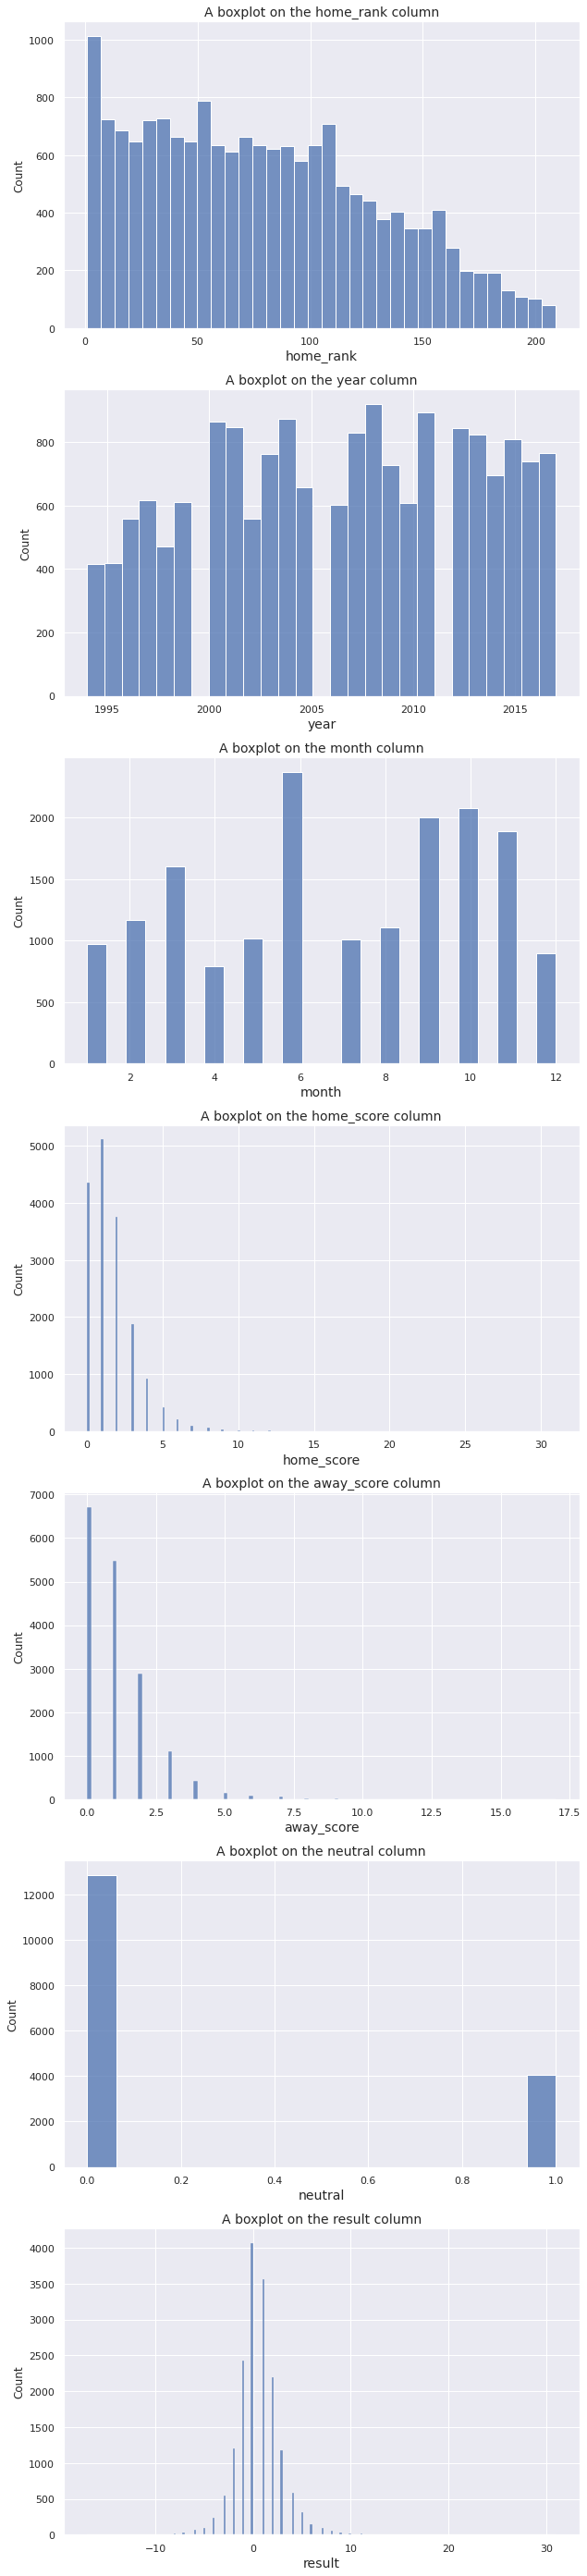

In [656]:

col_names = ['home_rank', 'year', 'month','home_score', 'away_score','neutral', 'result']
fig, ax = plt.subplots(len(col_names), figsize = (10,50))
for i, col_val in enumerate(col_names):

    sns.histplot(x = home[col_val], ax=ax[i])
    ax[i].set_title('A boxplot on the {} column'.format(col_val), fontsize=14)
    ax[i].set_xlabel(col_val, fontsize=14)
plt.show()

In [657]:
home.columns

Index(['home_rank', 'country_full', 'confederation', 'year', 'month',
       'home_team', 'away_team', 'home_score', 'away_score', 'tournament',
       'city', 'country', 'neutral', 'result', 'results'],
      dtype='object')

In [658]:
home.nunique()

home_rank         209
country_full      182
confederation       6
year               24
month              12
home_team         182
away_team         233
home_score         21
away_score         16
tournament         63
city             1289
country           192
neutral             2
result             35
results             3
dtype: int64

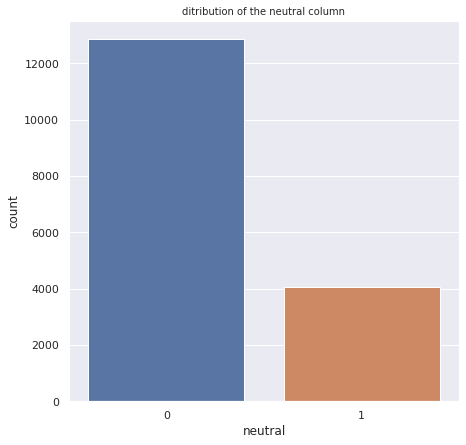

In [659]:
#Comparrison of ditribution of the neutral column
sns.countplot(x='neutral', data=home)
plt.title('ditribution of the neutral column', fontsize = 10)
plt.show()

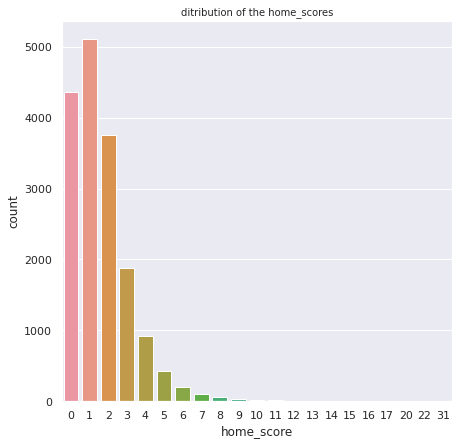

In [660]:
#Comparrison of ditribution of the home_scores
sns.countplot(x='home_score', data=home)
plt.title('ditribution of the home_scores', fontsize = 10)
plt.show()

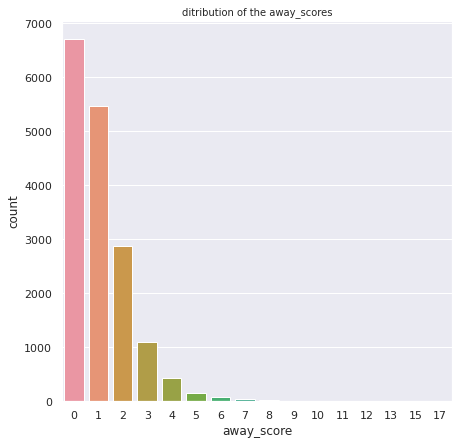

In [661]:
#Comparrison of ditribution of the away_scores
sns.countplot(x='away_score', data=home)
plt.title('ditribution of the away_scores', fontsize = 10)
plt.show()

<function matplotlib.pyplot.show>

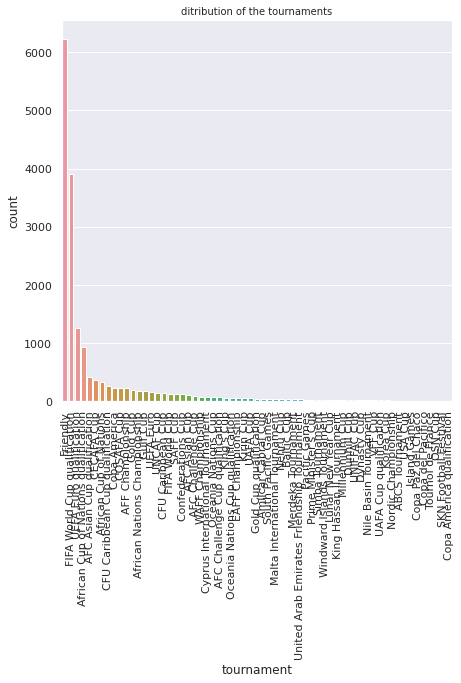

In [662]:
#Comparrison of ditribution of the tournaments
g = sns.countplot(x='tournament', data=home, order = home['tournament'].value_counts().index)
sns.set(rc={'figure.figsize':(20,55)})
plt.title('ditribution of the tournaments', fontsize = 10)
# plt.figure(figsize=(20,50))
g.set_xticklabels(g.get_xticklabels(),rotation=90)
plt.show

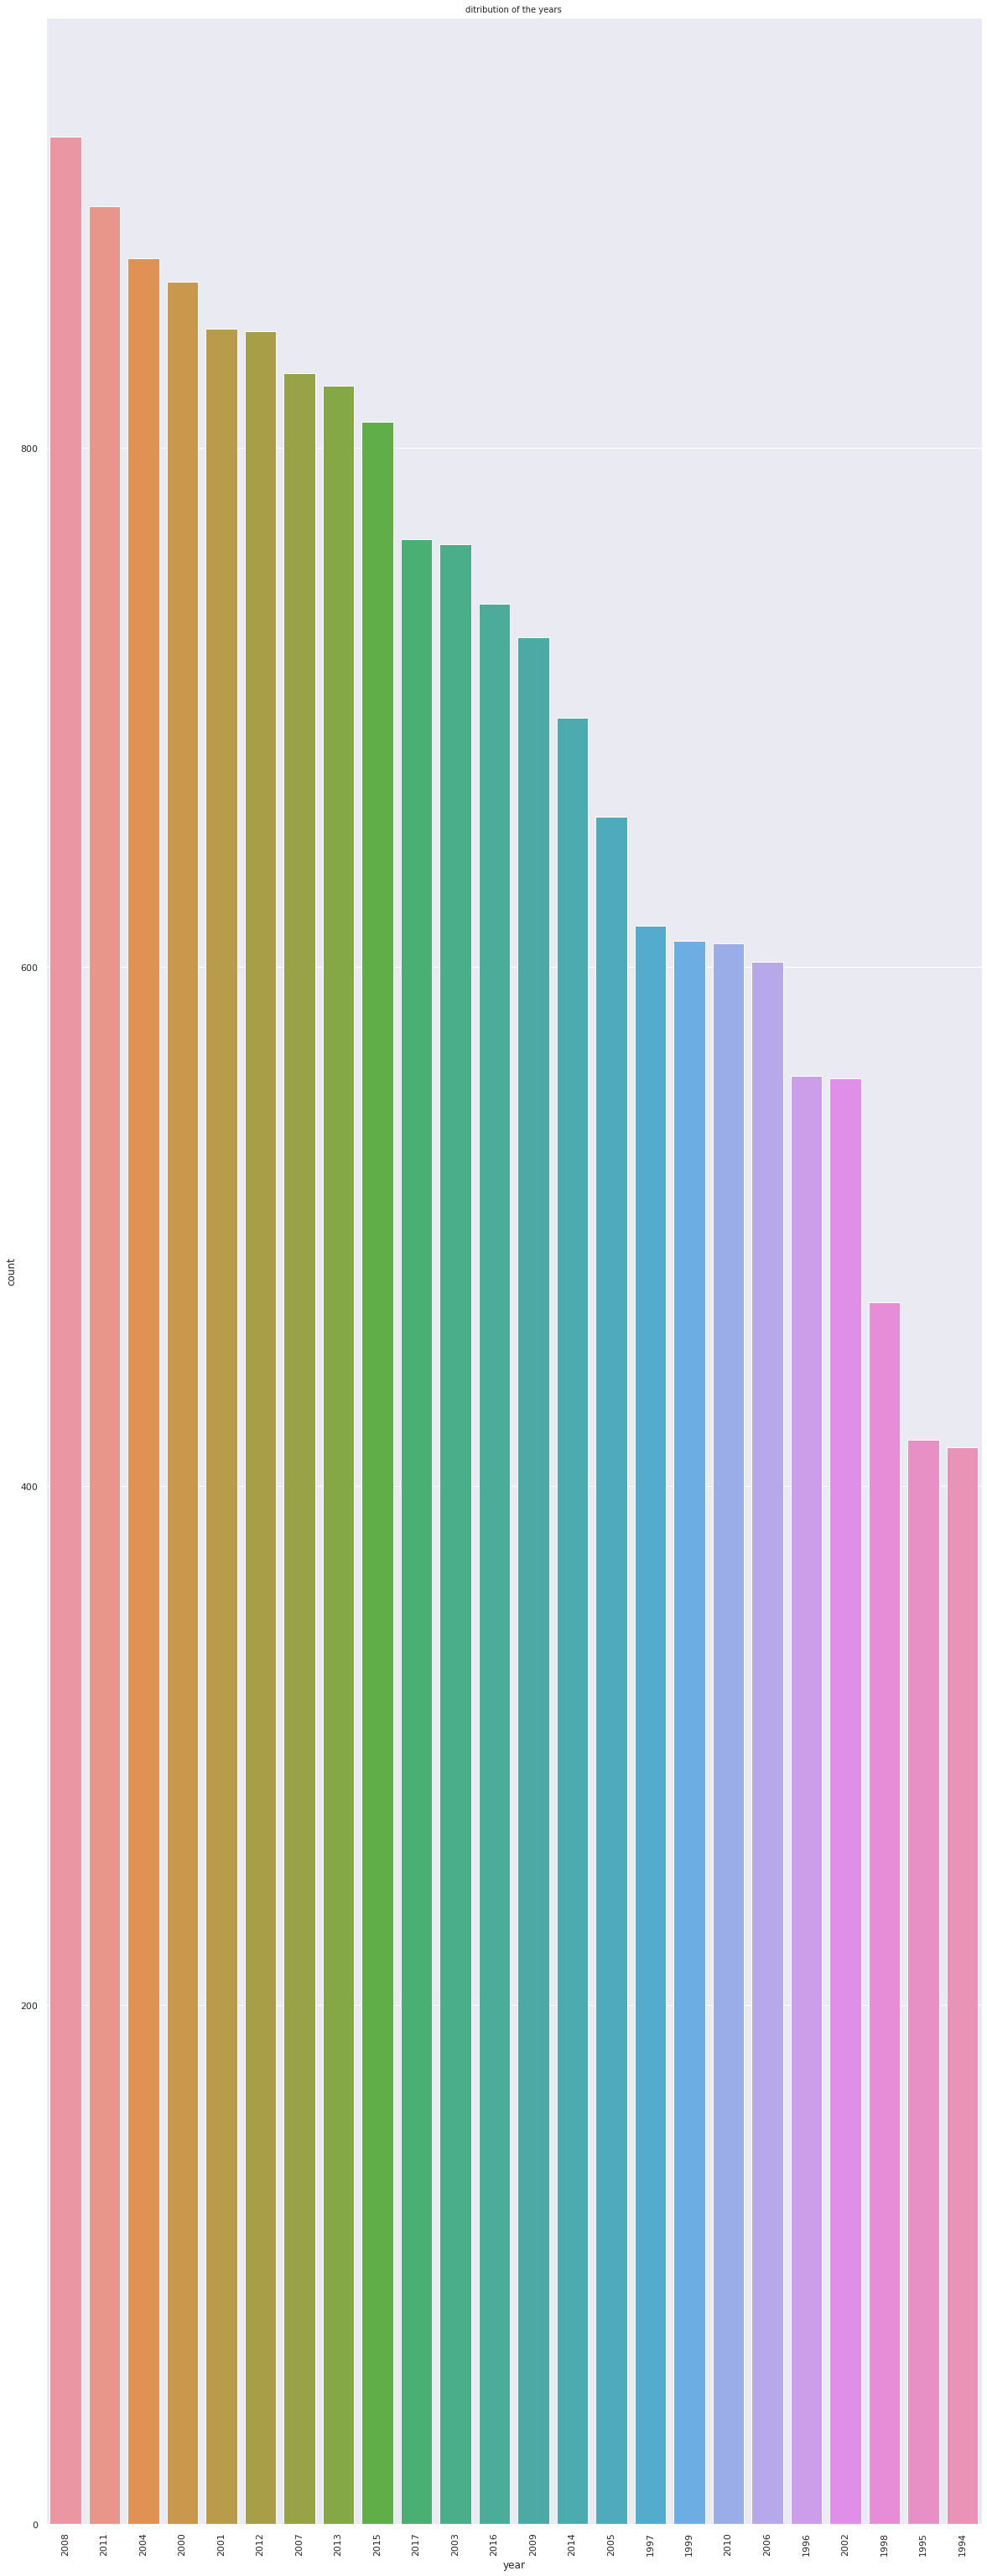

In [663]:
#Comparrison of ditribution of the years
y=sns.countplot(x='year', data=home, order = home['year'].value_counts().index)
sns.set(rc={'figure.figsize':(10,10)})
plt.title('ditribution of the years', fontsize = 10)
y.set_xticklabels(y.get_xticklabels(),rotation=90)
plt.show()

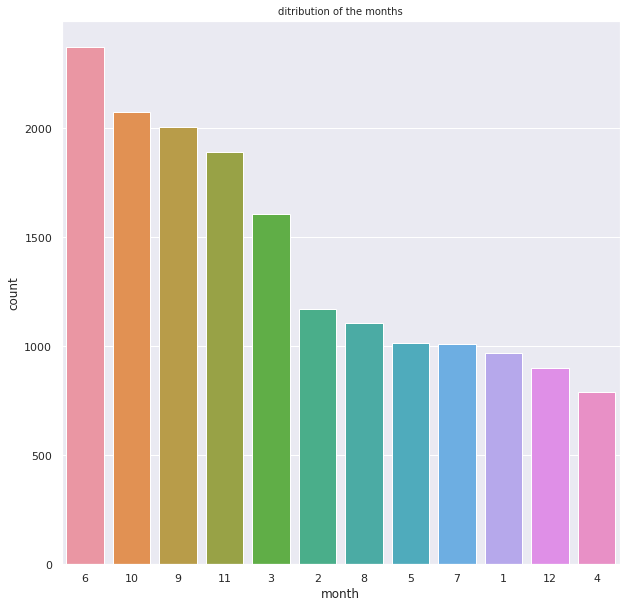

In [664]:
#Comparrison of ditribution of the months
sns.countplot(x='month', data=home, order = home['month'].value_counts().index)
z = plt.title('ditribution of the months', fontsize = 10)

plt.show()

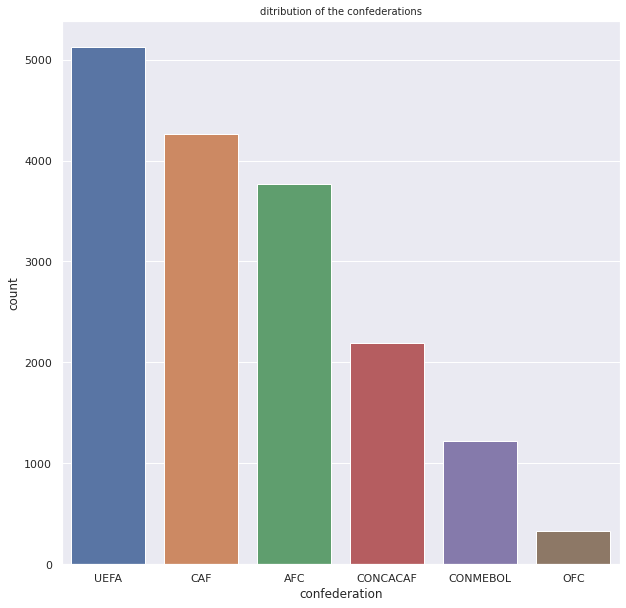

In [665]:
#Comparrison of ditribution of the confederations
sns.countplot(x='confederation', data=home, order = home['confederation'].value_counts().index)
plt.title('ditribution of the confederations', fontsize = 10)
plt.show()

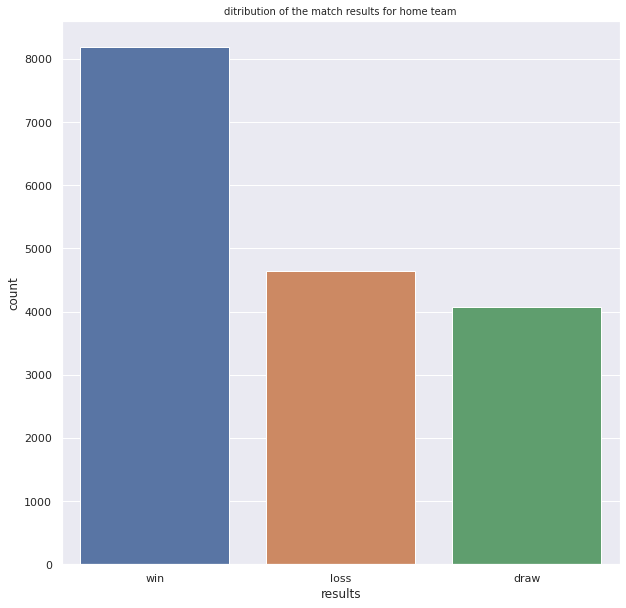

In [666]:
#Comparrison of ditribution of the results
sns.countplot(x='results', data=home, order = home['results'].value_counts().index)
plt.title('ditribution of the match results for home team', fontsize = 10)
plt.show()

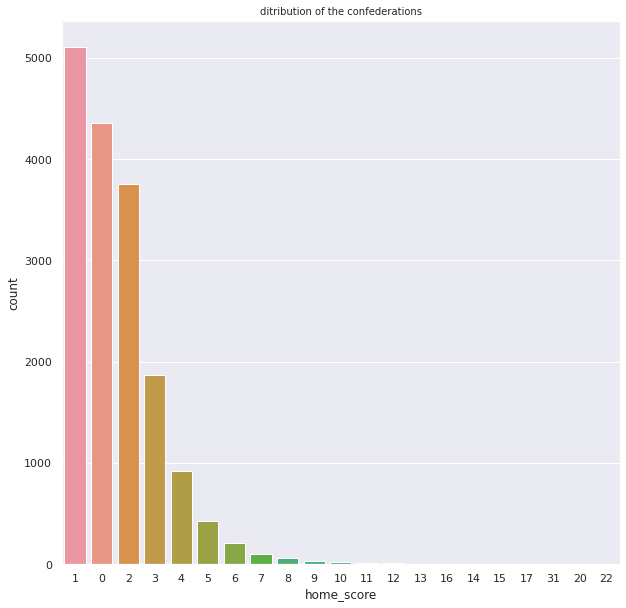

In [667]:
#Comparrison of ditribution of the confederations
sns.countplot(x='home_score', data=home, order = home['home_score'].value_counts().index)
plt.title('ditribution of the confederations', fontsize = 10)
plt.show()

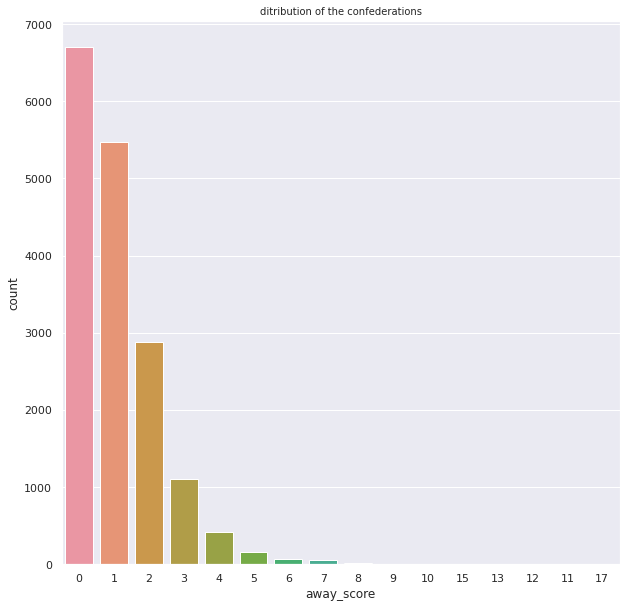

In [668]:
#Comparrison of ditribution of the confederations
sns.countplot(x='away_score', data=home, order = home['away_score'].value_counts().index)
plt.title('ditribution of the confederations', fontsize = 10)
plt.show()

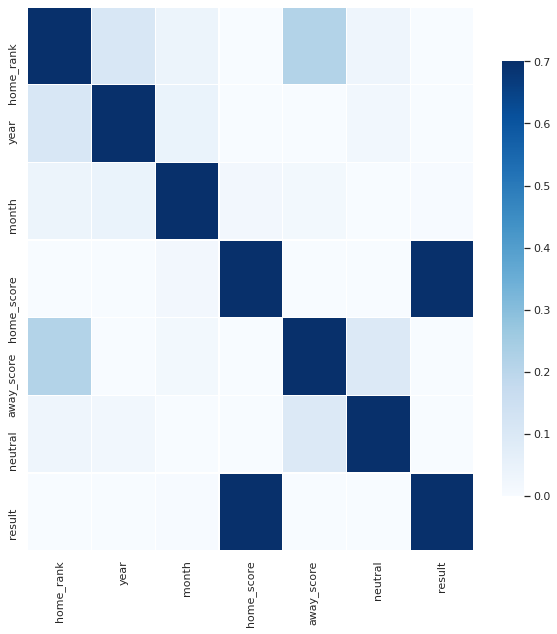

In [669]:
corr = home.corr()
sns.heatmap(corr, 
            xticklabels=corr.columns.values,
            yticklabels=corr.columns.values, cmap="Blues", vmin= 0.0, vmax=0.7,
           linewidth=0.3, cbar_kws={"shrink": .8})
sns.set(rc={'figure.figsize':(7,7)})

####Away

In [670]:
away.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 15884 entries, 0 to 15909
Data columns (total 15 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   away_rank      15884 non-null  int64 
 1   country_full   15884 non-null  object
 2   confederation  15884 non-null  object
 3   year           15884 non-null  int64 
 4   month          15884 non-null  int64 
 5   home_team      15884 non-null  object
 6   away_team      15884 non-null  object
 7   home_score     15884 non-null  int64 
 8   away_score     15884 non-null  int64 
 9   tournament     15884 non-null  object
 10  city           15884 non-null  object
 11  country        15884 non-null  object
 12  neutral        15884 non-null  int64 
 13  result         15884 non-null  int64 
 14  results        15884 non-null  object
dtypes: int64(7), object(8)
memory usage: 1.9+ MB


In [671]:
away.columns

Index(['away_rank', 'country_full', 'confederation', 'year', 'month',
       'home_team', 'away_team', 'home_score', 'away_score', 'tournament',
       'city', 'country', 'neutral', 'result', 'results'],
      dtype='object')

In [672]:
#Range for the respective columns
x = {}
col = ['away_rank', 'year', 'month','home_score', 'away_score','neutral', 'result']
for col in col:
    x[col] = away[col].max()- away[col].min()
z = pd.Series(x)
z = z.to_numpy()
z

data = {'Criteria': ['away_rank', 'year', 'month','home_score', 'away_score','neutral', 'result'], 
       'The range is': [208,  23,  11,  31,  18,   1,  49]} 
modeaway =pd.DataFrame(data)
modeaway

,Criteria,The range is
0,away_rank,208
1,year,23
2,month,11
3,home_score,31
4,away_score,18
5,neutral,1
6,result,49


In [673]:
# Standard Deviation
# We will now calculate the standard deviation to check the spread of our data from the mean

x = {}
col = ['away_rank', 'year', 'month','home_score', 'away_score','neutral', 'result']
for col in col:
    x[col] = away[col].std()
z = pd.Series(x)
z = z.to_numpy()
z

data = {'Criteria': ['away_rank', 'year', 'month','home_score', 'away_score','neutral', 'result'], 
        'The standard deviation is': [52.07595447,  6.59180461,  3.3043254 ,  1.64525225,  1.27720685,
      0.43211378,  2.24214348]} 
std =pd.DataFrame(data)
std





,Criteria,The standard deviation is
0,away_rank,52.075954
1,year,6.591805
2,month,3.304325
3,home_score,1.645252
4,away_score,1.277207
5,neutral,0.432114
6,result,2.242143


In [674]:
#Variance
# We will now calculate the Variance to check the spread of our data from the mean
#
#
x = {}
col = ['away_rank', 'year', 'month','home_score', 'away_score','neutral', 'result']
for col in col:
    x[col] = away[col].var()
z = pd.Series(x)
z = z.to_numpy()
z

data = {'Criteria': ['away_rank', 'year', 'month','home_score', 'away_score','neutral', 'result'], 
         'The variance is': [ 2.71190503e+03, 4.34518880e+01, 1.09185663e+01, 2.70685496e+00,
      1.63125734e+00, 1.86722323e-01, 5.02720737e+00]} 
var =pd.DataFrame(data)
var


,Criteria,The variance is
0,away_rank,2711.905030
1,year,43.451888
2,month,10.918566
3,home_score,2.706855
4,away_score,1.631257
5,neutral,0.186722
6,result,5.027207


In [675]:
#Kurtosis
# We will now calculate the Kurtosis to check the spread of our data

x = {}
col = ['away_rank', 'year', 'month','home_score', 'away_score','neutral', 'result']
for col in col:
    x[col] = away[col].kurt()
z = pd.Series(x)
z = z.to_numpy()
z

data = {'Criteria': ['away_rank', 'year', 'month','home_score', 'away_score','neutral', 'result'], 
         'The kurtosis is': [-0.73320073, -1.11845112, -1.16017985, 16.11394065, 12.31983426,
      -0.64394172,  7.38470012]} 
kurt =pd.DataFrame(data)
kurt


,Criteria,The kurtosis is
0,away_rank,-0.733201
1,year,-1.118451
2,month,-1.160180
3,home_score,16.113941
4,away_score,12.319834
5,neutral,-0.643942
6,result,7.384700


In [676]:
# #Skewness
# # We will now calculate the Skewness to check the spread of our data

x = {}
col = ['away_rank', 'year', 'month','home_score', 'away_score','neutral', 'result']
for col in col:
    x[col] = away[col].skew()
z = pd.Series(x)
z = z.to_numpy()
z

data = {'Criteria': ['away_rank', 'year', 'month','home_score', 'away_score','neutral', 'result'], 
         'The Skew is': [0.40915841, -0.10683617, -0.20500154,  2.41237109,  2.30819639,
       1.16453397,  0.56136714]}
 
skew =pd.DataFrame(data)
skew


,Criteria,The Skew is
0,away_rank,0.409158
1,year,-0.106836
2,month,-0.205002
3,home_score,2.412371
4,away_score,2.308196
5,neutral,1.164534
6,result,0.561367


In [677]:
away.columns

Index(['away_rank', 'country_full', 'confederation', 'year', 'month',
       'home_team', 'away_team', 'home_score', 'away_score', 'tournament',
       'city', 'country', 'neutral', 'result', 'results'],
      dtype='object')

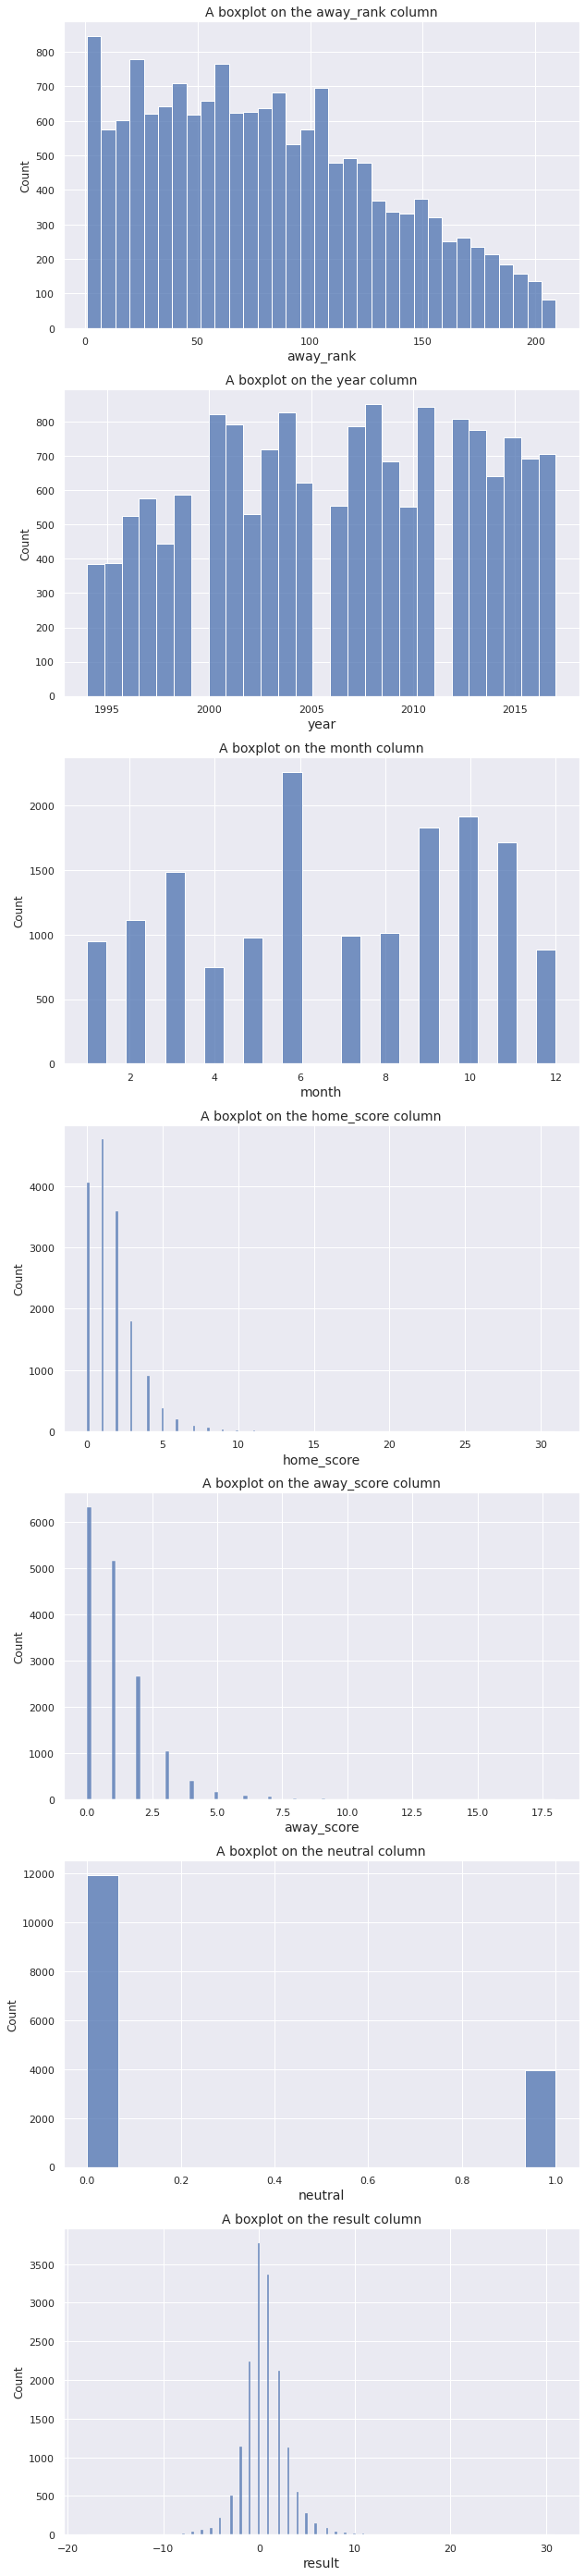

In [678]:

col_names = ['away_rank', 'year', 'month','home_score', 'away_score','neutral', 'result']
fig, ax = plt.subplots(len(col_names), figsize = (10,50))
for i, col_val in enumerate(col_names):

    sns.histplot(x = away[col_val], ax=ax[i])
    ax[i].set_title('A boxplot on the {} column'.format(col_val), fontsize=14)
    ax[i].set_xlabel(col_val, fontsize=14)
plt.show()

In [679]:
away.columns

Index(['away_rank', 'country_full', 'confederation', 'year', 'month',
       'home_team', 'away_team', 'home_score', 'away_score', 'tournament',
       'city', 'country', 'neutral', 'result', 'results'],
      dtype='object')

In [680]:
away.nunique()

away_rank         208
country_full      182
confederation       6
year               24
month              12
home_team         231
away_team         182
home_score         21
away_score         17
tournament         63
city             1290
country           200
neutral             2
result             36
results             3
dtype: int64

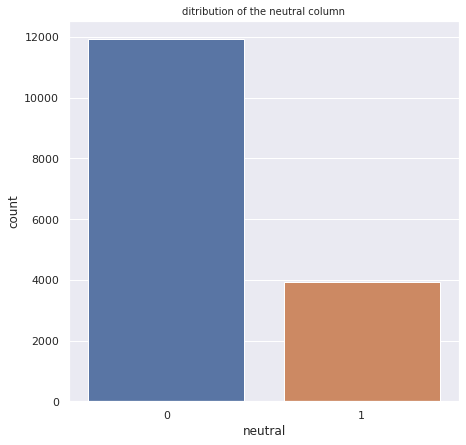

In [681]:
#Comparrison of ditribution of the neutral column
sns.countplot(x='neutral', data=away)
plt.title('ditribution of the neutral column', fontsize = 10)
plt.show()

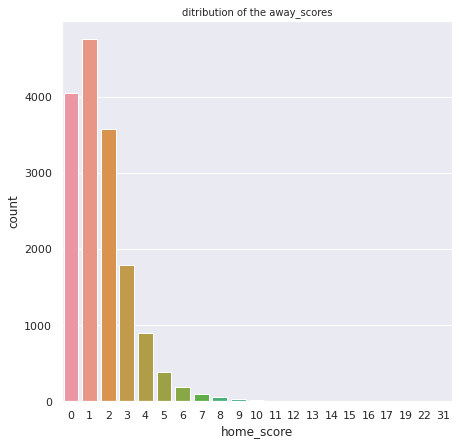

In [682]:
#Comparrison of ditribution of the home_scores
sns.countplot(x='home_score', data=away)
plt.title('ditribution of the away_scores', fontsize = 10)
plt.show()

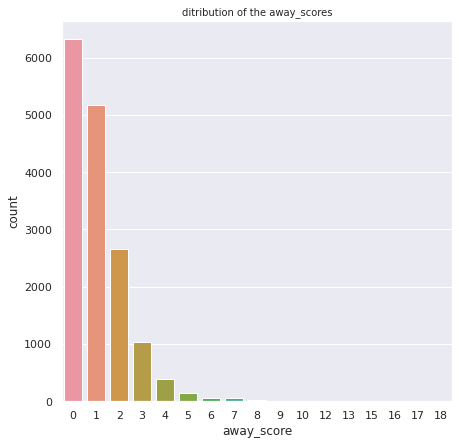

In [683]:
#Comparrison of ditribution of the away_scores
sns.countplot(x='away_score', data=away)
plt.title('ditribution of the away_scores', fontsize = 10)
plt.show()

<function matplotlib.pyplot.show>

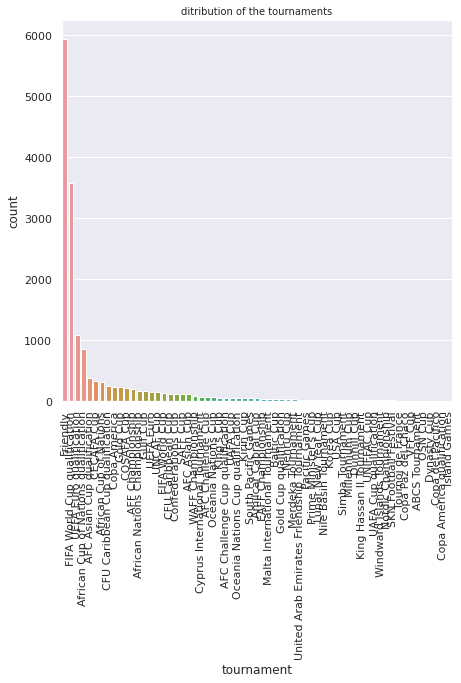

In [684]:
#Comparrison of ditribution of the tournaments
g = sns.countplot(x='tournament', data=away, order = away['tournament'].value_counts().index)
sns.set(rc={'figure.figsize':(20,55)})
plt.title('ditribution of the tournaments', fontsize = 10)
# plt.figure(figsize=(20,50))
g.set_xticklabels(g.get_xticklabels(),rotation=90)
plt.show

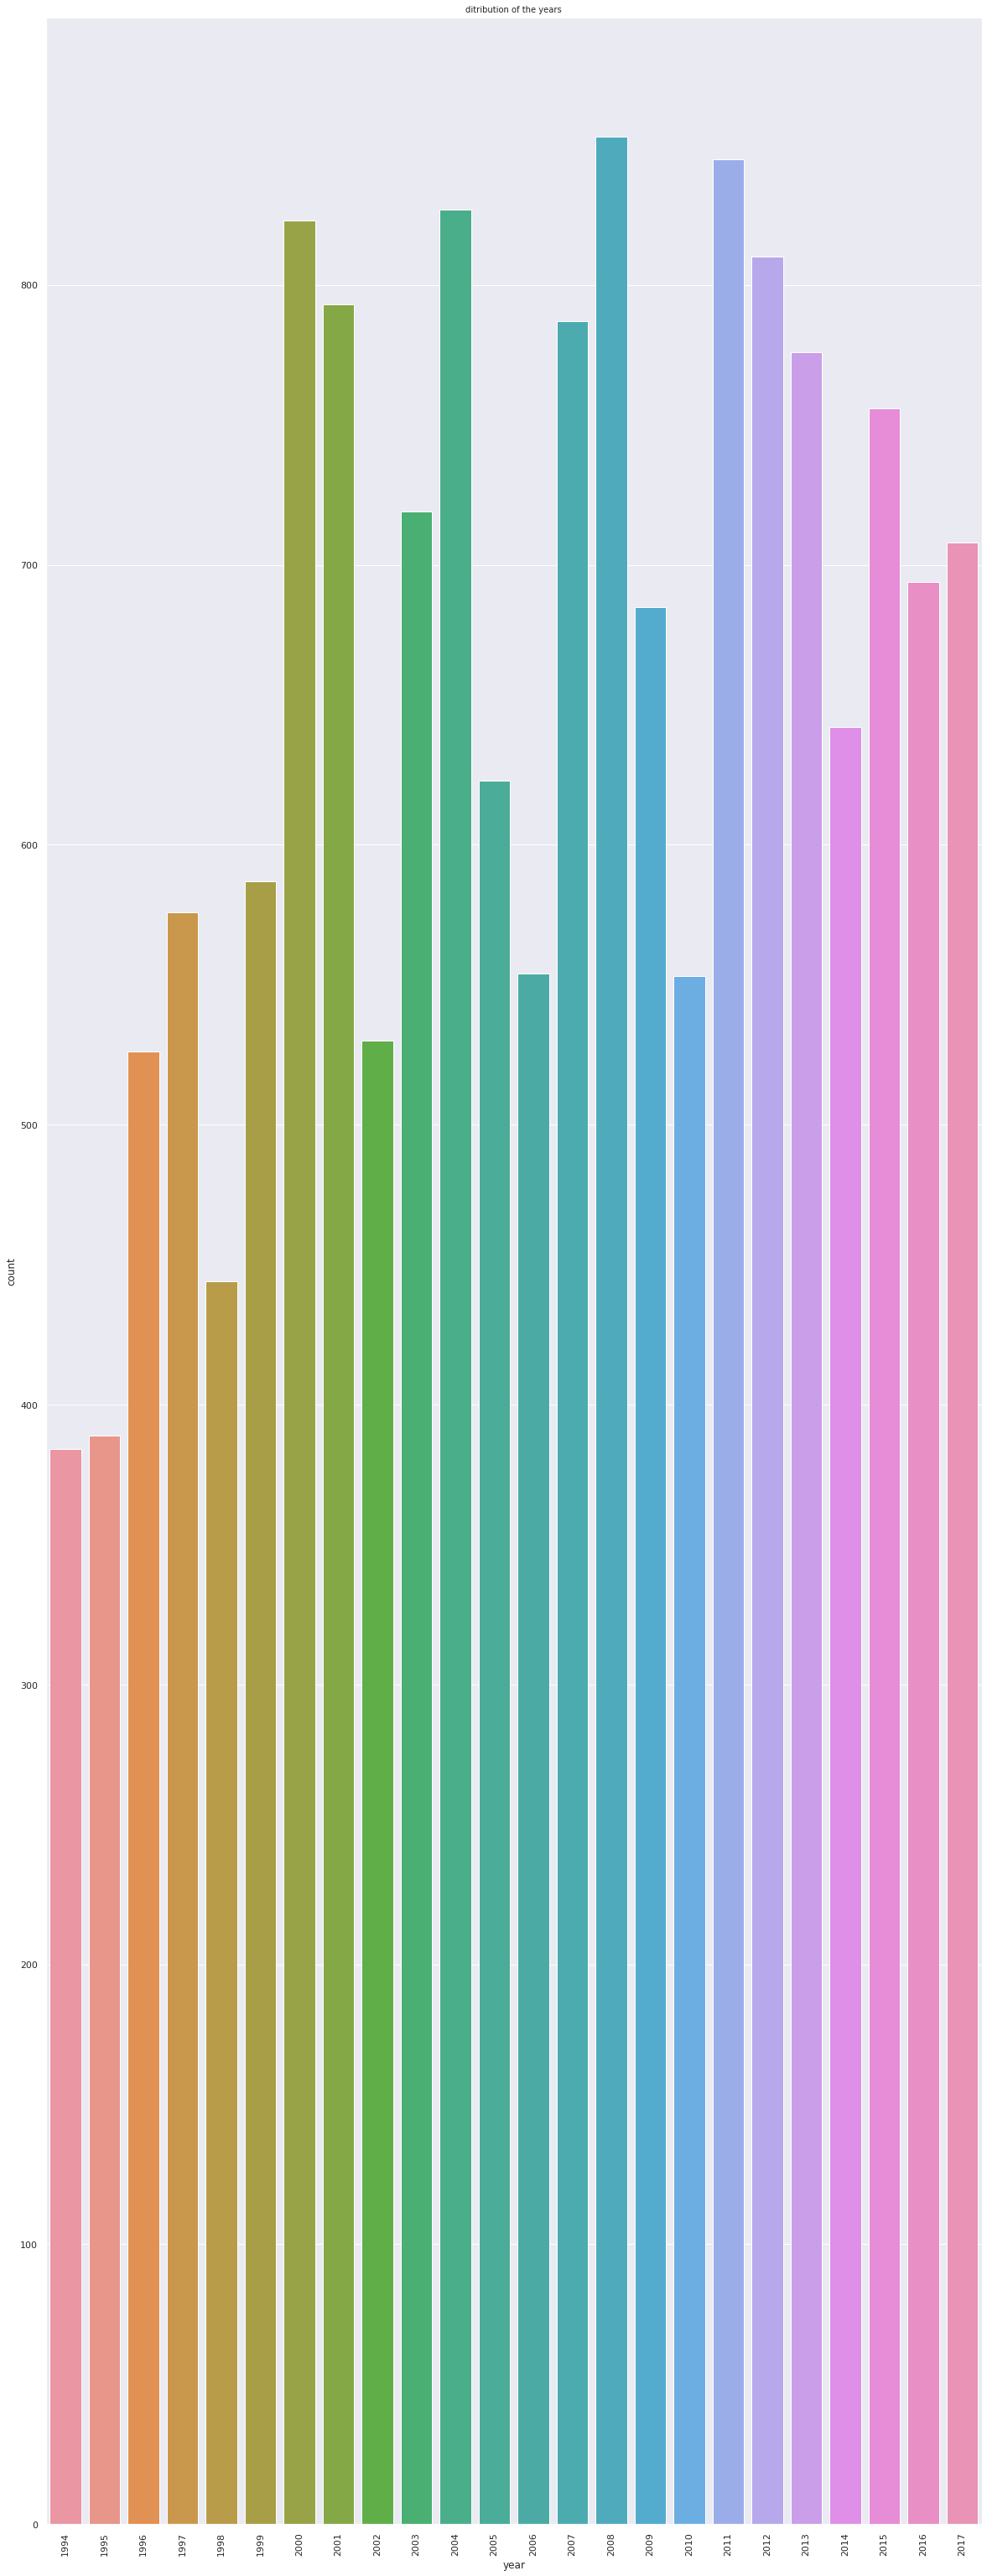

In [685]:
#Comparrison of ditribution of the years
y=sns.countplot(x='year', data=away)
sns.set(rc={'figure.figsize':(10,10)})
plt.title('ditribution of the years', fontsize = 10)
y.set_xticklabels(y.get_xticklabels(),rotation=90)
plt.show()

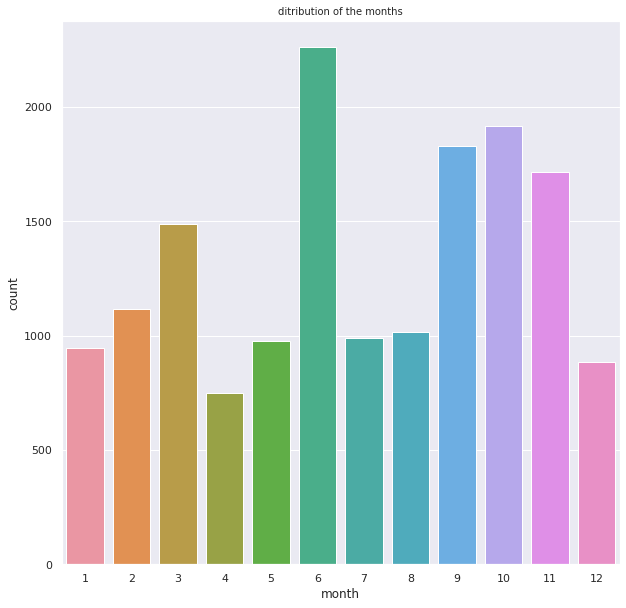

In [686]:
#Comparrison of ditribution of the months
sns.countplot(x='month', data=away)
z = plt.title('ditribution of the months', fontsize = 10)

plt.show()

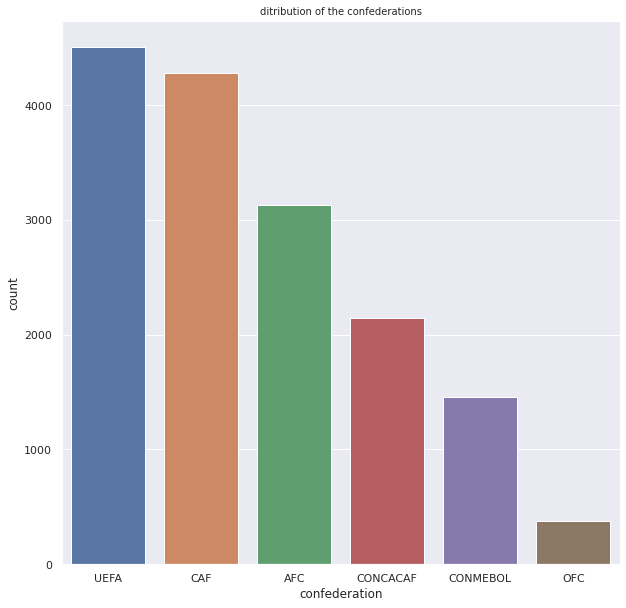

In [687]:
#Comparrison of ditribution of the confederations
sns.countplot(x='confederation', data=away, order = away['confederation'].value_counts().index)
plt.title('ditribution of the confederations', fontsize = 10)
plt.show()

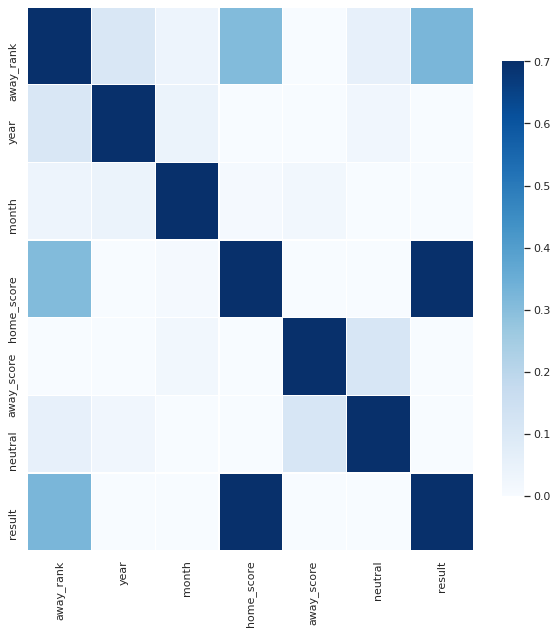

In [688]:
corr = away.corr()
sns.heatmap(corr, 
            xticklabels=corr.columns.values,
            yticklabels=corr.columns.values, cmap="Blues", vmin= 0.0, vmax=0.7,
           linewidth=0.3, cbar_kws={"shrink": .8})
sns.set(rc={'figure.figsize':(7,7)})

####Full Merged df

In [689]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 14621 entries, 0 to 14620
Data columns (total 16 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   home_rank        14621 non-null  int64 
 1   country_full     14621 non-null  object
 2   confederation_x  14621 non-null  object
 3   year             14621 non-null  int64 
 4   month            14621 non-null  int64 
 5   home_team        14621 non-null  object
 6   away_team        14621 non-null  object
 7   home_score       14621 non-null  int64 
 8   away_score       14621 non-null  int64 
 9   tournament       14621 non-null  object
 10  city             14621 non-null  object
 11  country          14621 non-null  object
 12  neutral          14621 non-null  int64 
 13  result           14621 non-null  int64 
 14  results          14621 non-null  object
 15  away_rank        14621 non-null  int64 
dtypes: int64(8), object(8)
memory usage: 1.9+ MB


In [690]:
df.columns

Index(['home_rank', 'country_full', 'confederation_x', 'year', 'month',
       'home_team', 'away_team', 'home_score', 'away_score', 'tournament',
       'city', 'country', 'neutral', 'result', 'results', 'away_rank'],
      dtype='object')

In [691]:
#Range for the respective columns
x = {}
col = ['home_rank', 'year', 'month','home_score', 'away_score','neutral', 'result', 'away_rank']
for col in col:
    x[col] = df[col].max()- df[col].min()
z = pd.Series(x)
z = z.to_numpy()
z

data = {'Criteria': ['home_rank', 'year', 'month','home_score', 'away_score','neutral', 'result', 'away_rank'], 
       'The range is': [ 208,  23,  11,  31,  15,   1,  46, 208]} 
modedf =pd.DataFrame(data)
modedf

,Criteria,The range is
0,home_rank,208
1,year,23
2,month,11
3,home_score,31
4,away_score,15
5,neutral,1
6,result,46
7,away_rank,208


In [692]:
# Standard Deviation
# We will now calculate the standard deviation to check the spread of our data from the mean

x = {}
col = ['home_rank', 'year', 'month','home_score', 'away_score','neutral', 'result', 'away_rank']
for col in col:
    x[col] = df[col].std()
z = pd.Series(x)
z = z.to_numpy()
z

data = {'Criteria': ['home_rank', 'year', 'month','home_score', 'away_score','neutral', 'result', 'away_rank'], 
        'The standard deviation is': [ 50.7880888 ,  6.58083293,  3.30038   ,  1.62154816,  1.24109707,
       0.42320113,  2.19656898, 51.77800401]} 
std =pd.DataFrame(data)
std





,Criteria,The standard deviation is
0,home_rank,50.788089
1,year,6.580833
2,month,3.300380
3,home_score,1.621548
4,away_score,1.241097
5,neutral,0.423201
6,result,2.196569
7,away_rank,51.778004


In [693]:
#Variance
# We will now calculate the Variance to check the spread of our data from the mean
#
#
x = {}
col = ['home_rank', 'year', 'month','home_score', 'away_score','neutral', 'result', 'away_rank']
for col in col:
    x[col] = df[col].var()
z = pd.Series(x)
z = z.to_numpy()
z

data = {'Criteria': ['home_rank', 'year', 'month','home_score', 'away_score','neutral', 'result', 'away_rank'], 
         'The variance is': [2.57942996e+03, 4.33073621e+01, 1.08925082e+01, 2.62941845e+00,
      1.54032195e+00, 1.79099193e-01, 4.82491526e+00, 2.68096170e+03]} 
var =pd.DataFrame(data)
var


,Criteria,The variance is
0,home_rank,2579.429960
1,year,43.307362
2,month,10.892508
3,home_score,2.629418
4,away_score,1.540322
5,neutral,0.179099
6,result,4.824915
7,away_rank,2680.961700


In [694]:
#Kurtosis
# We will now calculate the Kurtosis to check the spread of our data

x = {}
col = ['home_rank', 'year', 'month','home_score', 'away_score','neutral', 'result', 'away_rank']
for col in col:
    x[col] = df[col].kurt()
z = pd.Series(x)
z = z.to_numpy()
z

data = {'Criteria': ['home_rank', 'year', 'month','home_score', 'away_score','neutral', 'result', 'away_rank'], 
         'The kurtosis is': [-0.70492297, -1.11238756, -1.16978788, 15.86557311,  6.59081234,
      -0.41585187,  6.63388299, -0.71751945]} 
kurt =pd.DataFrame(data)
kurt


,Criteria,The kurtosis is
0,home_rank,-0.704923
1,year,-1.112388
2,month,-1.169788
3,home_score,15.865573
4,away_score,6.590812
5,neutral,-0.415852
6,result,6.633883
7,away_rank,-0.717519


In [695]:
# #Skewness
# # We will now calculate the Skewness to check the spread of our data

x = {}
col = ['home_rank', 'year', 'month','home_score', 'away_score','neutral', 'result', 'away_rank']
for col in col:
    x[col] = df[col].skew()
z = pd.Series(x)
z = z.to_numpy()
z

data = {'Criteria': ['home_rank', 'year', 'month','home_score', 'away_score','neutral', 'result', 'away_rank'], 
         'The Skew is': [0.42161686, -0.11860762, -0.21382748,  2.35015613,  1.88840298,
       1.25865207,  0.65179154,  0.41484347]}
 
skew =pd.DataFrame(data)
skew


,Criteria,The Skew is
0,home_rank,0.421617
1,year,-0.118608
2,month,-0.213827
3,home_score,2.350156
4,away_score,1.888403
5,neutral,1.258652
6,result,0.651792
7,away_rank,0.414843


In [696]:
df.columns

Index(['home_rank', 'country_full', 'confederation_x', 'year', 'month',
       'home_team', 'away_team', 'home_score', 'away_score', 'tournament',
       'city', 'country', 'neutral', 'result', 'results', 'away_rank'],
      dtype='object')

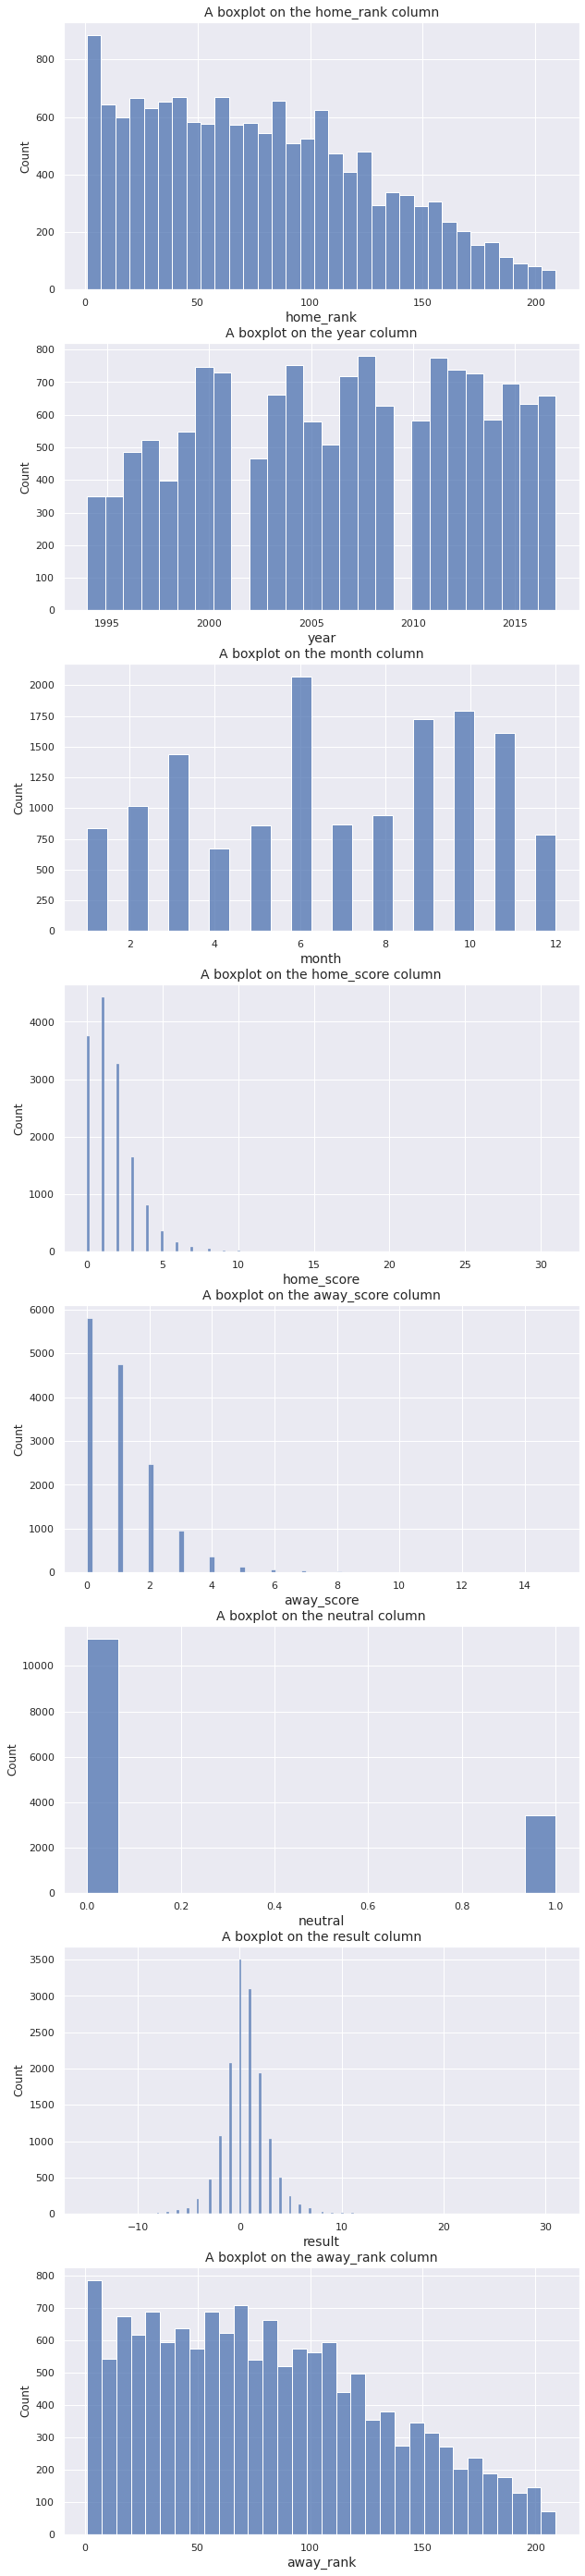

In [697]:

col_names = ['home_rank', 'year', 'month','home_score', 'away_score','neutral', 'result', 'away_rank']
fig, ax = plt.subplots(len(col_names), figsize = (10,50))
for i, col_val in enumerate(col_names):

    sns.histplot(x = df[col_val], ax=ax[i])
    ax[i].set_title('A boxplot on the {} column'.format(col_val), fontsize=14)
    ax[i].set_xlabel(col_val, fontsize=14)
plt.show()

In [698]:
df.columns

Index(['home_rank', 'country_full', 'confederation_x', 'year', 'month',
       'home_team', 'away_team', 'home_score', 'away_score', 'tournament',
       'city', 'country', 'neutral', 'result', 'results', 'away_rank'],
      dtype='object')

In [699]:
df.nunique()

home_rank           209
country_full        182
confederation_x       6
year                 24
month                12
home_team           182
away_team           182
home_score           20
away_score           14
tournament           62
city               1213
country             191
neutral               2
result               33
results               3
away_rank           208
dtype: int64

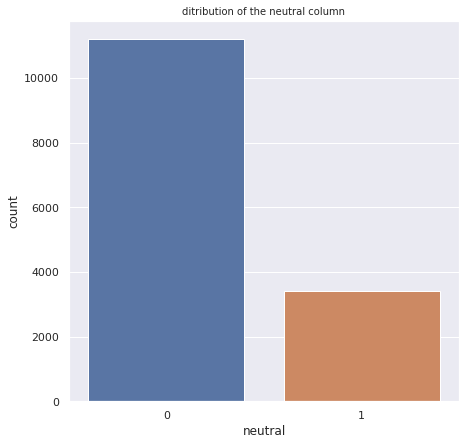

In [700]:
#Comparrison of ditribution of the neutral column
sns.countplot(x='neutral', data=df)
plt.title('ditribution of the neutral column', fontsize = 10)
plt.show()

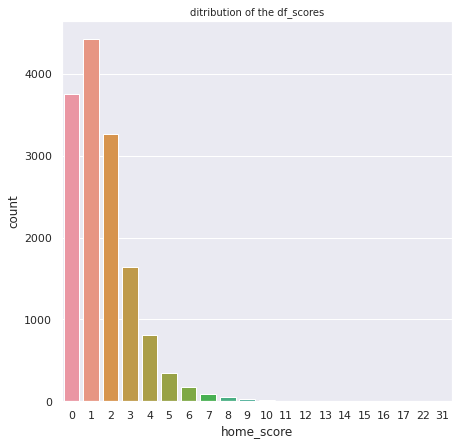

In [701]:
#Comparrison of ditribution of the home_scores
sns.countplot(x='home_score', data=df)
plt.title('ditribution of the df_scores', fontsize = 10)
plt.show()

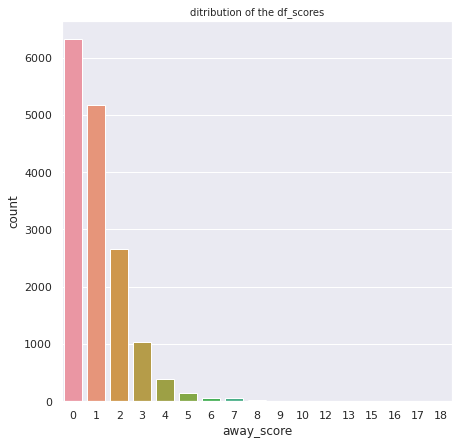

In [702]:
#Comparrison of ditribution of the df_scores
sns.countplot(x='away_score', data=away)
plt.title('ditribution of the df_scores', fontsize = 10)
plt.show()

<function matplotlib.pyplot.show>

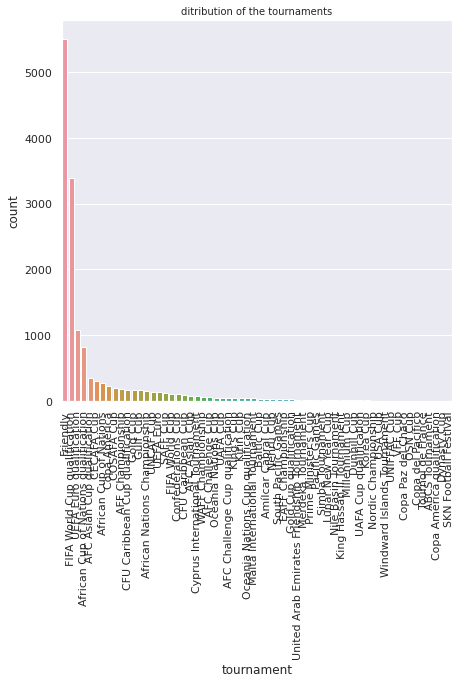

In [703]:
#Comparrison of ditribution of the tournaments
g = sns.countplot(x='tournament', data=df, order = df['tournament'].value_counts().index)
sns.set(rc={'figure.figsize':(20,55)})
plt.title('ditribution of the tournaments', fontsize = 10)
# plt.figure(figsize=(20,50))
g.set_xticklabels(g.get_xticklabels(),rotation=90)
plt.show

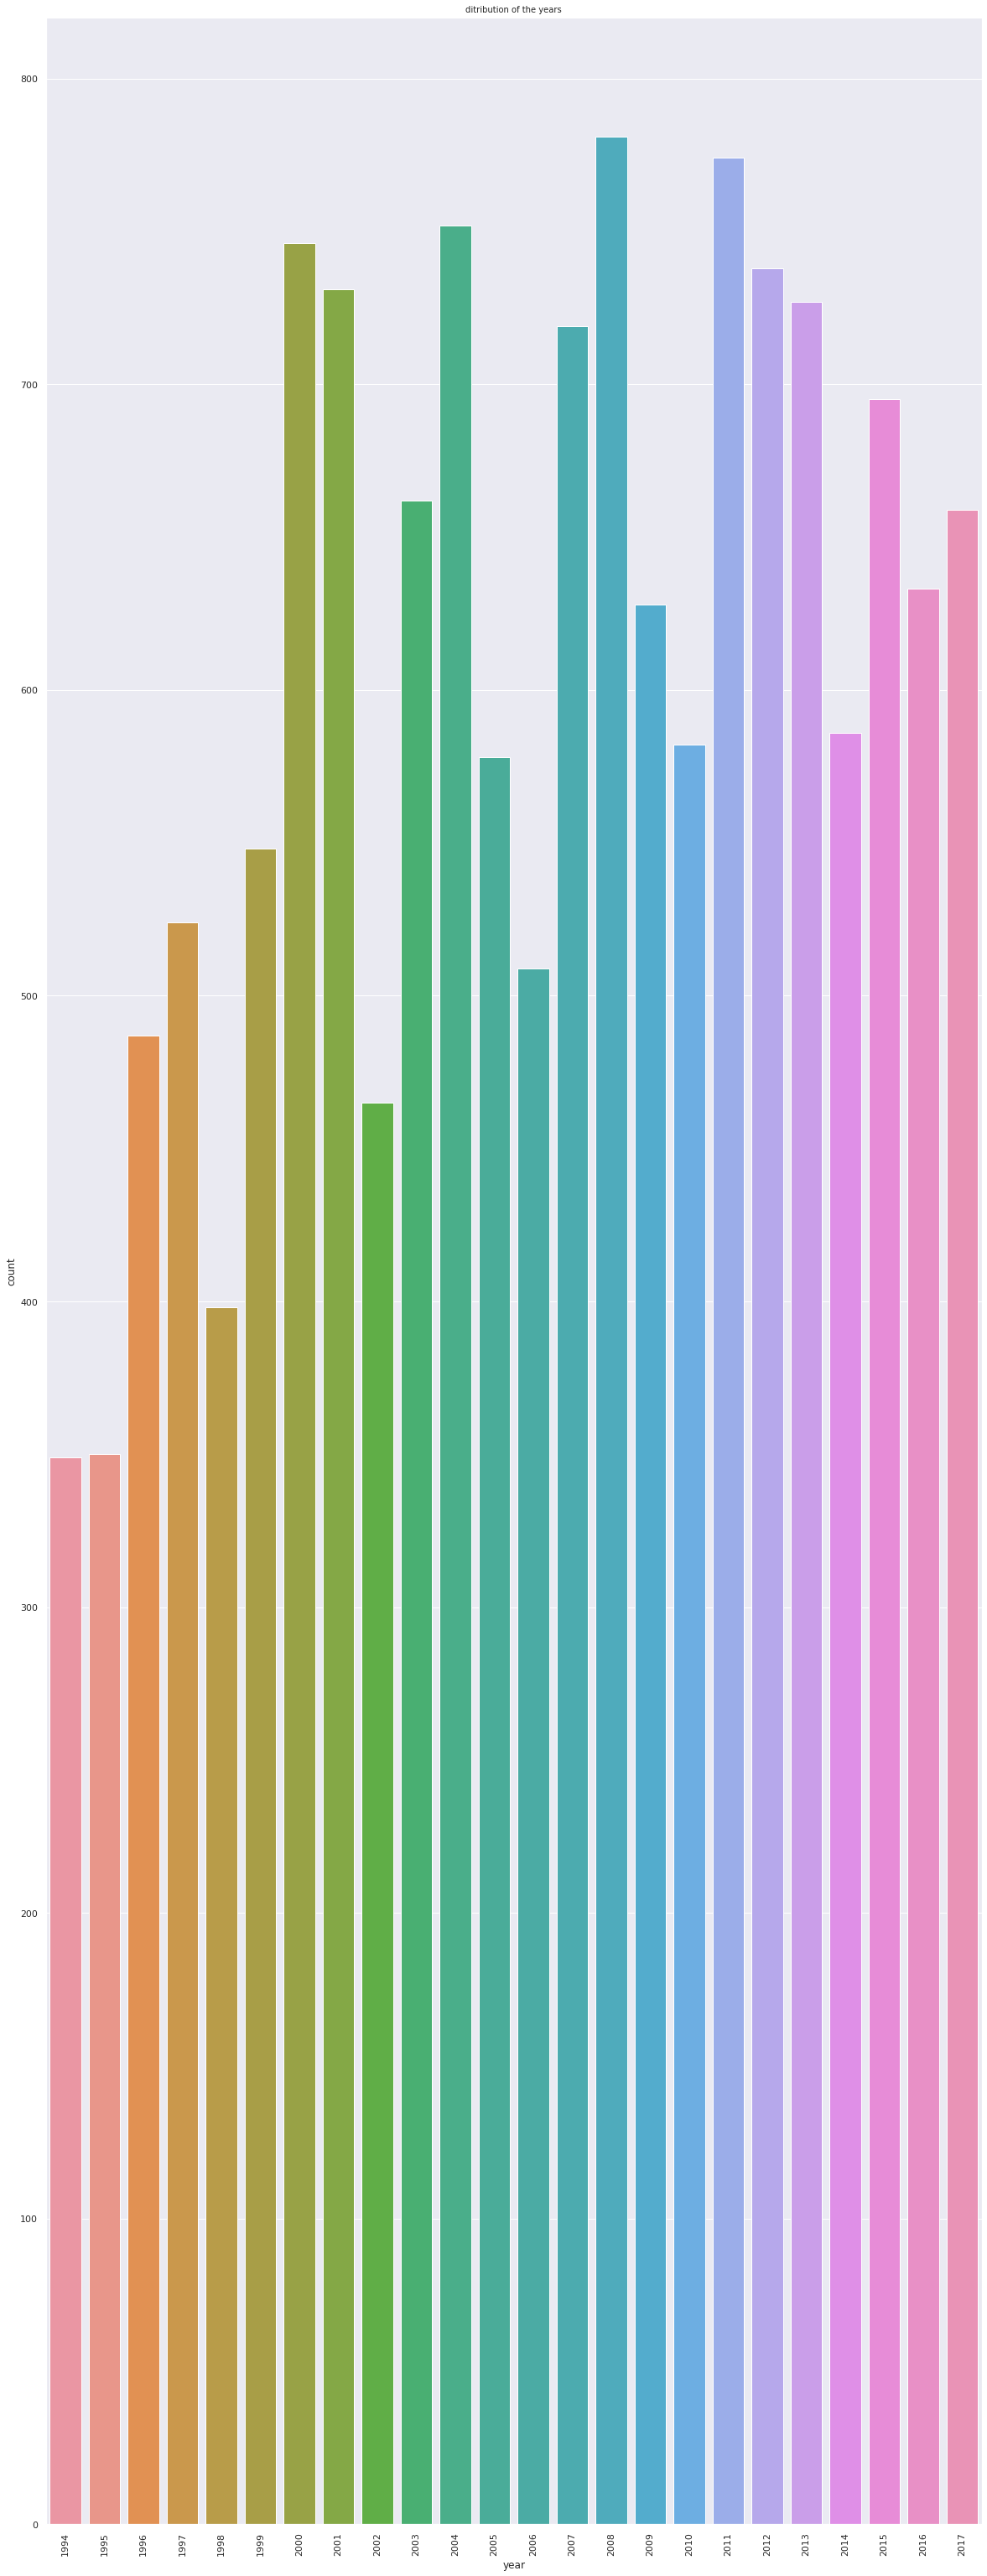

In [704]:
#Comparrison of ditribution of the years
y=sns.countplot(x='year', data=df)
sns.set(rc={'figure.figsize':(10,10)})
plt.title('ditribution of the years', fontsize = 10)
y.set_xticklabels(y.get_xticklabels(),rotation=90)
plt.show()

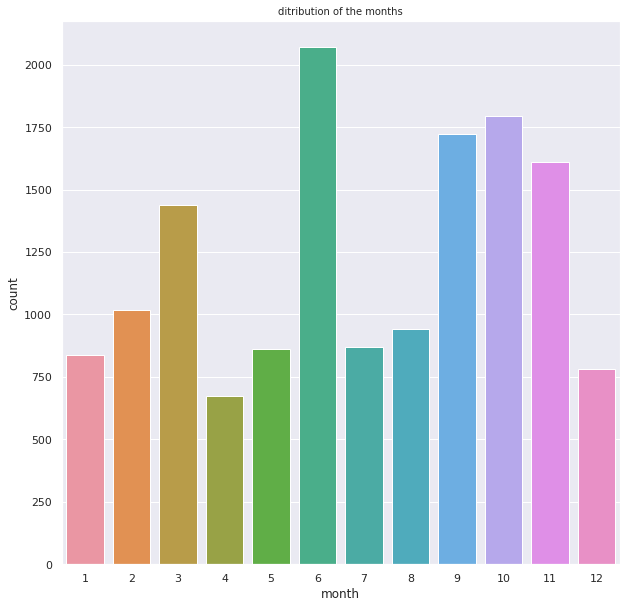

In [705]:
#Comparrison of ditribution of the months
sns.countplot(x='month', data=df)
z = plt.title('ditribution of the months', fontsize = 10)

plt.show()

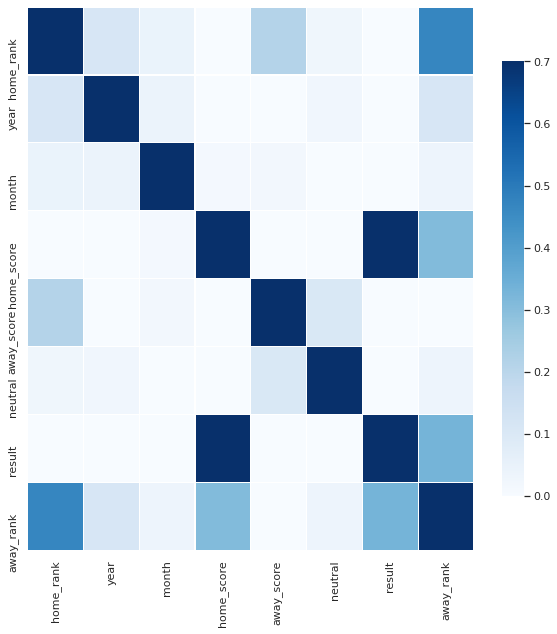

In [706]:
corr = df.corr()
sns.heatmap(corr, 
            xticklabels=corr.columns.values,
            yticklabels=corr.columns.values, cmap="Blues", vmin= 0.0, vmax=0.7,
           linewidth=0.3, cbar_kws={"shrink": .8})
sns.set(rc={'figure.figsize':(7,7)})

####Bivariate analysis

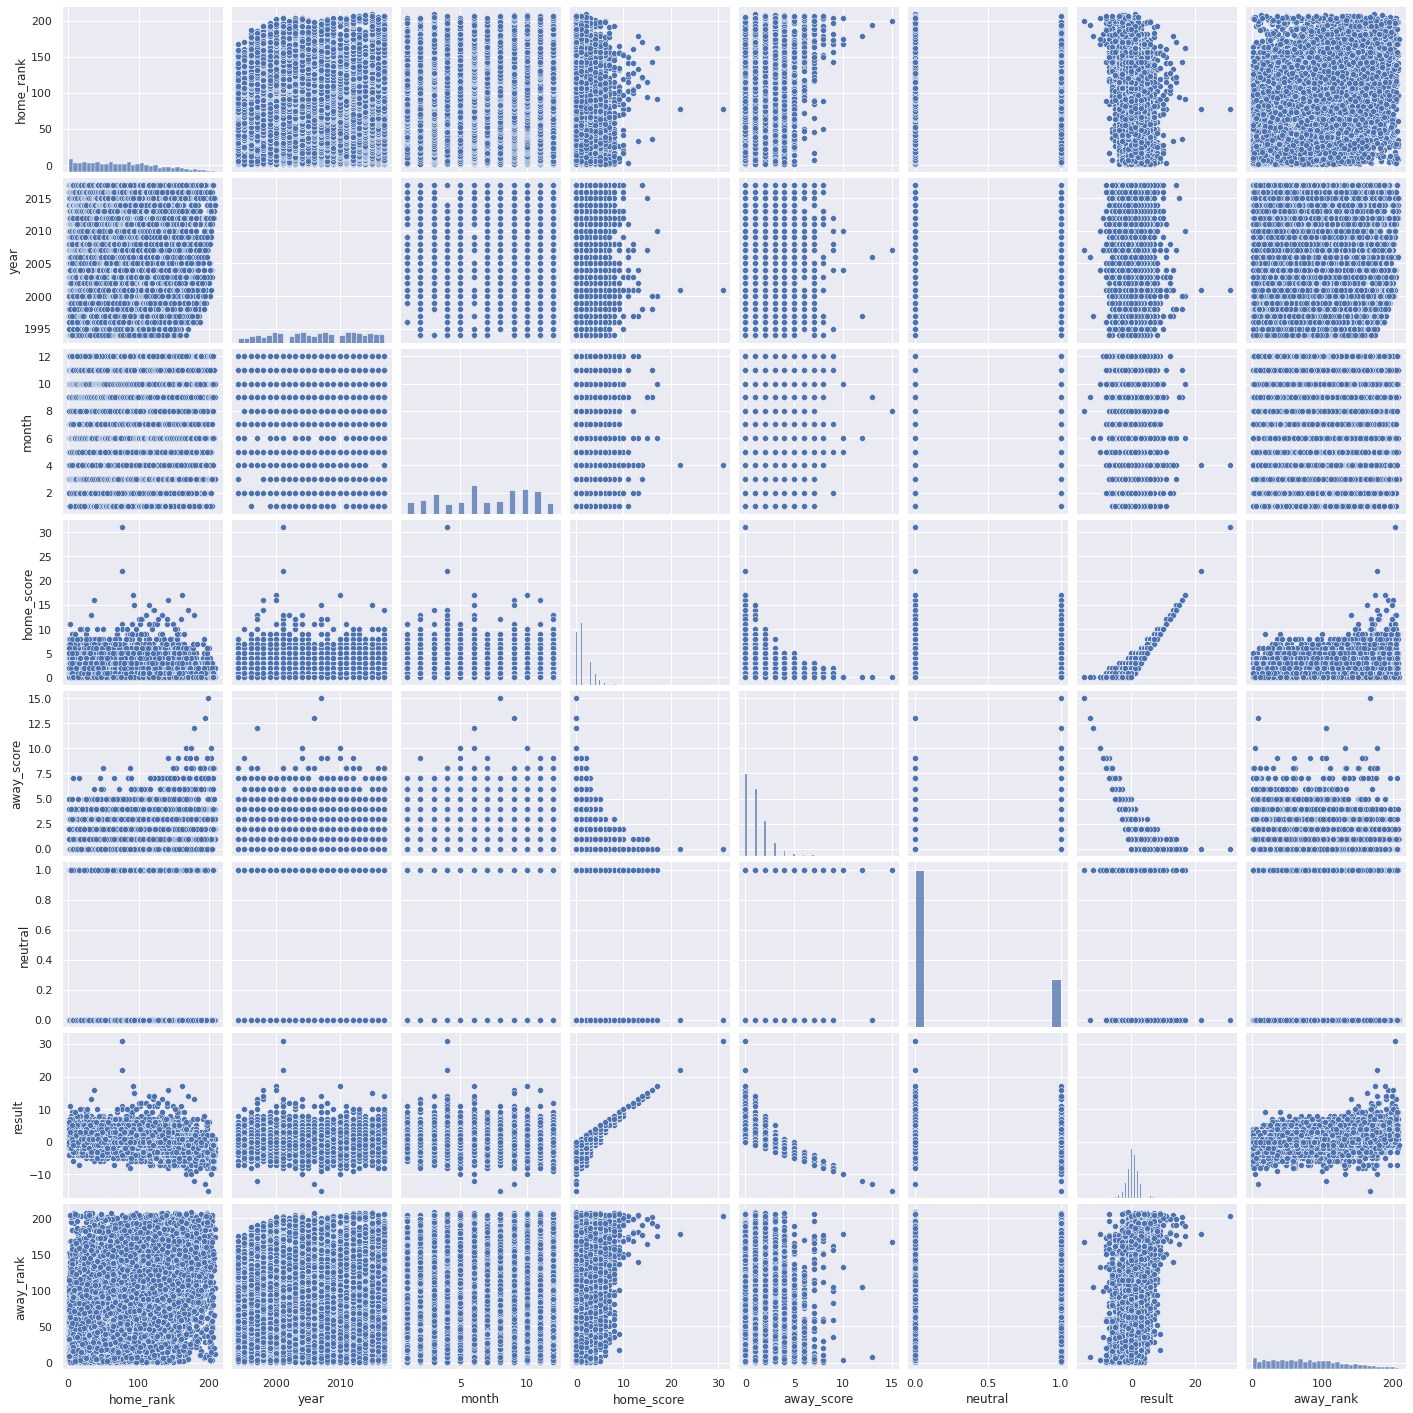

In [707]:
# Ploting the bivariate summaries and recording our observations
# scatterplot
sns.pairplot(df)
plt.show()


In [708]:
# Calculating the pearson coefficient
pearson_coeff = df["home_score"].corr(df["away_score"], method="pearson") 
print(pearson_coeff)

# Checking whether you have to define the pearson
coeff = df["home_score"].corr(df["away_score"])
print(coeff)

-0.162776471751597
-0.162776471751597


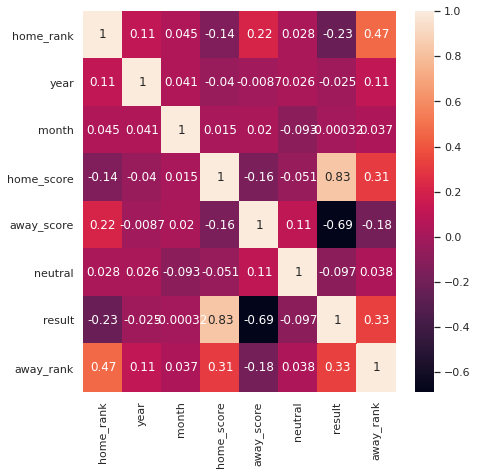

In [709]:
# heatmap
sns.heatmap(df.corr(),annot=True)
plt.show()

##8. Polynomial Regression Analysis

####Checking for multiicolinierity

In [710]:
correlations=df.corr()
pd.DataFrame(np.linalg.inv(correlations.values), index = correlations.index, columns=correlations.columns)

,home_rank,year,month,home_score,away_score,neutral,result,away_rank
home_rank,1.638663,-0.057942,-0.025745,8.537238e-01,-7.615846e-01,0.064366,-5.234765e-01,-0.993268
year,-0.057942,1.023393,-0.039180,2.619560e-01,-1.324189e-01,-0.023242,-2.634968e-01,-0.104150
month,-0.025745,-0.039180,1.013880,-1.239797e-01,5.259397e-02,0.099691,1.511973e-01,-0.027165
home_score,0.857729,0.261923,-0.123810,-1.563256e+13,1.196482e+13,-0.078083,2.117606e+13,-1.517399
away_score,-0.763866,-0.132462,0.052510,1.196482e+13,-9.157606e+12,-0.017493,-1.620769e+13,1.130674
neutral,0.064366,-0.023242,0.099691,-7.896068e-02,-1.682092e-02,1.030373,2.071895e-01,-0.117700
result,-0.527372,-0.263495,0.150956,2.117606e+13,-1.620769e+13,0.206001,-2.868535e+13,1.209504
away_rank,-0.993268,-0.104150,-0.027165,-1.513265e+00,1.127511e+00,-0.117700,1.203905e+00,1.758261


In [711]:
# dropping anything with a vif score above 5
df.drop(['home_rank'],axis=1,inplace=True) 

In [712]:
#checking how vif score has been affected
correlations=df.corr()
pd.DataFrame(np.linalg.inv(correlations.values), index = correlations.index, columns=correlations.columns)

,year,month,home_score,away_score,neutral,result,away_rank
year,1.021345,-0.040091,2.935865e-01,-1.605601e-01,-0.020966,-2.839607e-01,-0.139272
month,-0.040091,1.013476,-1.111586e-01,4.111213e-02,0.100702,1.438201e-01,-0.042770
home_score,0.293449,-0.111132,-1.573277e+13,1.204151e+13,-0.113044,2.131180e+13,-0.999888
away_score,-0.160388,0.041119,1.204151e+13,-9.216308e+12,0.013483,-1.631158e+13,0.669495
neutral,-0.020966,0.100702,-1.130436e-01,1.348322e-02,1.027845,2.284351e-01,-0.078685
result,-0.283764,0.143751,2.131180e+13,-1.631158e+13,0.228435,-2.886923e+13,0.893087
away_rank,-0.139272,-0.042770,-9.998878e-01,6.694950e-01,-0.078685,8.930875e-01,1.156196


#### Model 1 - Predicting the Home Score

In [713]:
df['tournament'] =lb.fit_transform(df['tournament'])
df['home_team'] =lb.fit_transform(df['home_team'])
df['away_team'] =lb.fit_transform(df['away_team'])


In [714]:
#Defining our dependent and independent variables
X = df[['away_rank','tournament','home_score','home_team', 'away_score']].values
y = df['result'].values
print('the X array is: ',X)
print('the X array is: ',y)

the X array is:  [[ 24  26   1 154   1]
 [ 14  26   0  83   1]
 [ 13  26   1 109   4]
 ...
 [101  26   0  90   1]
 [ 73  26   0  90   0]
 [151  26   0 165   8]]
the X array is:  [ 0 -1 -3 ... -1  0 -8]


In [715]:
X_train,X_test,y_train,y_test = train_test_split(X,y, test_size =0.3,random_state=42)

In [716]:
# Split the dataset into train and test sets

X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=0)

In [717]:
#Feature scaling
# We now need to perform feature scaling. We execute the following code to do so:
# 
from sklearn.preprocessing import StandardScaler
regressor = LinearRegression()
regressor.fit(X_train, y_train)
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

In [718]:

# from sklearn.discriminant_analysis import LinearDiscriminantAnalysis as LDA
# lda = LDA(n_components=1)
# X_train = lda.fit_transform(X_train, y_train)
# X_test = lda.transform(X_test)

In [719]:
#Grid Search
alpha = [0.1, 0.4, 0.5, 0.7, 0.9, 1.0]
parameters = dict(alpha = alpha)
grid_search = GridSearchCV(Lasso(), parameters, cv = 3, return_train_score= True)
grid_search.fit(X_train, y_train)
grid_search.best_params_

{'alpha': 0.1}

In [720]:
#Lets see how the different alpha values compare to each other

for i in range(len(parameters['alpha'])):
  print('parameters', grid_search.cv_results_['params'][i])
  print('mean Test scores:', grid_search.cv_results_['mean_test_score'][i])
  print('Rank:', grid_search.cv_results_['rank_test_score'][i])

parameters {'alpha': 0.1}
mean Test scores: 0.9964318583602836
Rank: 1
parameters {'alpha': 0.4}
mean Test scores: 0.9429095312131196
Rank: 2
parameters {'alpha': 0.5}
mean Test scores: 0.9107961214213351
Rank: 3
parameters {'alpha': 0.7}
mean Test scores: 0.8251606883588843
Rank: 4
parameters {'alpha': 0.9}
mean Test scores: 0.7109796042033331
Rank: 5
parameters {'alpha': 1.0}
mean Test scores: 0.6431848664481418
Rank: 6


In [721]:
#Lasso model

lasso_model = Lasso(alpha = grid_search.best_params_['alpha']).fit(X_train, y_train)
lasso_model
print('Training score:', lasso_model.score(X_train, y_train))
y_pred = lasso_model.predict(X_test)
y_pred
print('Test score:', r2_score(y_test, y_pred))

# Making Predictions

# To compare the actual output values for X_test with the predicted values
# 
dff = pd.DataFrame({'Actual': y_test, 'Predicted': y_pred})
dff


Training score: 0.99644148907016
Test score: 0.9964722005887219


,Actual,Predicted
0,-2,-1.850390
1,1,0.974416
2,3,2.852369
3,-4,-3.712593
4,-1,-0.919288
...,...,...
2920,1,0.958665
2921,-1,-0.903538
2922,1,0.974416
2923,0,0.011813


In [722]:
#Lasso model
# Evaluating the Algorithm
# ---
# 
from sklearn import metrics
print('Mean Absolute Error:', metrics.mean_absolute_error(y_test, y_pred))
print('Mean Squared Error:', metrics.mean_squared_error(y_test, y_pred))
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y_test, y_pred)))


Mean Absolute Error: 0.09369261292588249
Mean Squared Error: 0.017118541780813526
Root Mean Squared Error: 0.1308378453690427


In [723]:
#Lasso model
#assessing heteroscedasticity using barlett's test
residuals = np.subtract(y_pred, y_test)
residuals.mean()

-0.0023624819725963776

In [724]:
#Polynomial regressor model

y_pred = regressor.predict(X_test)
print('Test score:', r2_score(y_test, y_pred))

# Making Predictions

# To compare the actual output values for X_test with the predicted values
# 
dff = pd.DataFrame({'Actual': y_test, 'Predicted': y_pred})
dff

Test score: 0.8338510512988657


,Actual,Predicted
0,-2,-1.745520
1,1,0.298495
2,3,1.722424
3,-4,-3.353205
4,-1,-0.941677
...,...,...
2920,1,0.482252
2921,-1,-1.125434
2922,1,0.298495
2923,0,-0.137834


In [725]:
#Polynomial regressor model
# Evaluating the Algorithm

from sklearn import metrics
print('Mean Absolute Error:', metrics.mean_absolute_error(y_test, y_pred))
print('Mean Squared Error:', metrics.mean_squared_error(y_test, y_pred))
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y_test, y_pred)))

Mean Absolute Error: 0.6482051131375218
Mean Squared Error: 0.8062328348618133
Root Mean Squared Error: 0.8979046914131885


In [726]:
#Polynomial regressor model
#assessing heteroscedasticity using barlett's test
residuals = np.subtract(y_pred, y_test)
residuals.mean()

-0.5546588415589976

In [727]:
#Decision trees
max_depth = [1, 2, 3, 4, 5]

parameters = dict(max_depth = max_depth)

grid_search = GridSearchCV(DecisionTreeRegressor(), parameters, cv = 3, return_train_score = True)

grid_search.fit(X_train, y_train)
print(grid_search.best_params_)
print('\n')

#Lets see how the different max depth values compare to each other
print('how do the different deoths compare to each other''\n')
for i in range(len(parameters['max_depth'])):
  print('parameters', grid_search.cv_results_['params'][i])
  print('mean Test scores:', grid_search.cv_results_['mean_test_score'][i])
  print('Rank:', grid_search.cv_results_['rank_test_score'][i])


print('\n')
dtree_model = Lasso(alpha = grid_search.best_params_['max_depth']).fit(X_train, y_train)
dtree_model
print('Training score:', dtree_model.score(X_train, y_train))
print('Test score:', r2_score(y_test, y_pred))
y_pred = dtree_model.predict(X_test)
y_pred

{'max_depth': 5}


how do the different deoths compare to each other

parameters {'max_depth': 1}
mean Test scores: 0.41053923719891916
Rank: 5
parameters {'max_depth': 2}
mean Test scores: 0.6985950610664657
Rank: 4
parameters {'max_depth': 3}
mean Test scores: 0.8533036816097882
Rank: 3
parameters {'max_depth': 4}
mean Test scores: 0.9351448612061172
Rank: 2
parameters {'max_depth': 5}
mean Test scores: 0.9837237241529347
Rank: 1


Training score: 0.0
Test score: 0.8338510512988657


array([0.53881669, 0.53881669, 0.53881669, ..., 0.53881669, 0.53881669,
       0.53881669])

In [728]:
#Decision Trees

dff = pd.DataFrame({'Actual': y_test, 'Predicted': y_pred})
dff

,Actual,Predicted
0,-2,0.538817
1,1,0.538817
2,3,0.538817
3,-4,0.538817
4,-1,0.538817
...,...,...
2920,1,0.538817
2921,-1,0.538817
2922,1,0.538817
2923,0,0.538817


In [729]:
#Decision Trees model
# Evaluating the Algorithm

from sklearn import metrics
print('Mean Absolute Error:', metrics.mean_absolute_error(y_test, y_pred))
print('Mean Squared Error:', metrics.mean_squared_error(y_test, y_pred))
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y_test, y_pred)))

Mean Absolute Error: 1.5812310147672664
Mean Squared Error: 4.854354315677418
Root Mean Squared Error: 2.203259929213396


In [730]:
#Decision Trees model
#assessing heteroscedasticity using barlett's test
residuals = np.subtract(y_pred, y_test)
residuals.mean()

-0.043405532755737775

#### Model 2 - Predicting the away Score

In [731]:
df.columns

Index(['country_full', 'confederation_x', 'year', 'month', 'home_team',
       'away_team', 'home_score', 'away_score', 'tournament', 'city',
       'country', 'neutral', 'result', 'results', 'away_rank'],
      dtype='object')

In [732]:
#Defining our dependent and independent variables
X = df[['away_rank','tournament','home_score', 'home_team', 'away_score']].values
y = df['result'].values
print('the X array is: ',X)
print('the X array is: ',y)

the X array is:  [[ 24  26   1 154   1]
 [ 14  26   0  83   1]
 [ 13  26   1 109   4]
 ...
 [101  26   0  90   1]
 [ 73  26   0  90   0]
 [151  26   0 165   8]]
the X array is:  [ 0 -1 -3 ... -1  0 -8]


In [733]:
# Split the dataset into train and test sets

X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=0)

In [734]:
#Feature scaling
# We now need to perform feature scaling. We execute the following code to do so:
# 
from sklearn.preprocessing import StandardScaler
regressor = LinearRegression()
regressor.fit(X_train, y_train)
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

In [735]:
#Grid Search
alpha = [0.1, 0.4, 0.5, 0.7, 0.9, 1.0]
parameters = dict(alpha = alpha)
grid_search = GridSearchCV(Lasso(), parameters, cv = 3, return_train_score= True)
grid_search.fit(X_train, y_train)
grid_search.best_params_

{'alpha': 0.1}

In [736]:
#Lets see how the different alpha values compare to each other

for i in range(len(parameters['alpha'])):
  print('parameters', grid_search.cv_results_['params'][i])
  print('mean Test scores:', grid_search.cv_results_['mean_test_score'][i])
  print('Rank:', grid_search.cv_results_['rank_test_score'][i])

parameters {'alpha': 0.1}
mean Test scores: 0.9964318583602836
Rank: 1
parameters {'alpha': 0.4}
mean Test scores: 0.9429095312131196
Rank: 2
parameters {'alpha': 0.5}
mean Test scores: 0.9107961214213351
Rank: 3
parameters {'alpha': 0.7}
mean Test scores: 0.8251606883588843
Rank: 4
parameters {'alpha': 0.9}
mean Test scores: 0.7109796042033331
Rank: 5
parameters {'alpha': 1.0}
mean Test scores: 0.6431848664481418
Rank: 6


In [737]:
#Lasso model

lasso_model = Lasso(alpha = grid_search.best_params_['alpha']).fit(X_train, y_train)
lasso_model
print('Training score:', lasso_model.score(X_train, y_train))
y_pred = lasso_model.predict(X_test)
y_pred
print('Test score:', r2_score(y_test, y_pred))

# Making Predictions

# To compare the actual output values for X_test with the predicted values
# 
dff = pd.DataFrame({'Actual': y_test, 'Predicted': y_pred})
dff



Training score: 0.99644148907016
Test score: 0.9964722005887219


,Actual,Predicted
0,-2,-1.850390
1,1,0.974416
2,3,2.852369
3,-4,-3.712593
4,-1,-0.919288
...,...,...
2920,1,0.958665
2921,-1,-0.903538
2922,1,0.974416
2923,0,0.011813


In [738]:
#Lasso model
# Evaluating the Algorithm
# ---
# 
from sklearn import metrics
print('Mean Absolute Error:', metrics.mean_absolute_error(y_test, y_pred))
print('Mean Squared Error:', metrics.mean_squared_error(y_test, y_pred))
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y_test, y_pred)))


Mean Absolute Error: 0.09369261292588249
Mean Squared Error: 0.017118541780813526
Root Mean Squared Error: 0.1308378453690427


In [739]:
#Lasso model
#assessing heteroscedasticity using barlett's test
residuals = np.subtract(y_pred, y_test)
residuals.mean()

-0.0023624819725963776

In [740]:
#Polynomial regressor model

y_pred = regressor.predict(X_test)
print('Test score:', r2_score(y_test, y_pred))

# Making Predictions

# To compare the actual output values for X_test with the predicted values
# 
dff = pd.DataFrame({'Actual': y_test, 'Predicted': y_pred})
dff

Test score: 0.8338510512988657


,Actual,Predicted
0,-2,-1.745520
1,1,0.298495
2,3,1.722424
3,-4,-3.353205
4,-1,-0.941677
...,...,...
2920,1,0.482252
2921,-1,-1.125434
2922,1,0.298495
2923,0,-0.137834


In [741]:
#Polynomial regressor model
# Evaluating the Algorithm

from sklearn import metrics
print('Mean Absolute Error:', metrics.mean_absolute_error(y_test, y_pred))
print('Mean Squared Error:', metrics.mean_squared_error(y_test, y_pred))
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y_test, y_pred)))

Mean Absolute Error: 0.6482051131375218
Mean Squared Error: 0.8062328348618133
Root Mean Squared Error: 0.8979046914131885


In [742]:
#Polynomial regressor model
#assessing heteroscedasticity using barlett's test
residuals = np.subtract(y_pred, y_test)
residuals.mean()

-0.5546588415589976

In [743]:
#Decision trees
max_depth = [1, 2, 3, 4, 5]

parameters = dict(max_depth = max_depth)

grid_search = GridSearchCV(DecisionTreeRegressor(), parameters, cv = 3, return_train_score = True)

grid_search.fit(X_train, y_train)
print(grid_search.best_params_)
print('\n')

#Lets see how the different max depth values compare to each other
print('how do the different deoths compare to each other''\n')
for i in range(len(parameters['max_depth'])):
  print('parameters', grid_search.cv_results_['params'][i])
  print('mean Test scores:', grid_search.cv_results_['mean_test_score'][i])
  print('Rank:', grid_search.cv_results_['rank_test_score'][i])


print('\n')
dtree_model = Lasso(alpha = grid_search.best_params_['max_depth']).fit(X_train, y_train)
dtree_model
print('Training score:', dtree_model.score(X_train, y_train))
print('Test score:', r2_score(y_test, y_pred))
y_pred = dtree_model.predict(X_test)
y_pred

{'max_depth': 5}


how do the different deoths compare to each other

parameters {'max_depth': 1}
mean Test scores: 0.41053923719891916
Rank: 5
parameters {'max_depth': 2}
mean Test scores: 0.6985950610664657
Rank: 4
parameters {'max_depth': 3}
mean Test scores: 0.8533036816097882
Rank: 3
parameters {'max_depth': 4}
mean Test scores: 0.9351448612061172
Rank: 2
parameters {'max_depth': 5}
mean Test scores: 0.9841443104312559
Rank: 1


Training score: 0.0
Test score: 0.8338510512988657


array([0.53881669, 0.53881669, 0.53881669, ..., 0.53881669, 0.53881669,
       0.53881669])

In [744]:
dff = pd.DataFrame({'Actual': y_test, 'Predicted': y_pred})
dff

,Actual,Predicted
0,-2,0.538817
1,1,0.538817
2,3,0.538817
3,-4,0.538817
4,-1,0.538817
...,...,...
2920,1,0.538817
2921,-1,0.538817
2922,1,0.538817
2923,0,0.538817


In [745]:
#Decision Trees model
# Evaluating the Algorithm

from sklearn import metrics
print('Mean Absolute Error:', metrics.mean_absolute_error(y_test, y_pred))
print('Mean Squared Error:', metrics.mean_squared_error(y_test, y_pred))
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y_test, y_pred)))

Mean Absolute Error: 1.5812310147672664
Mean Squared Error: 4.854354315677418
Root Mean Squared Error: 2.203259929213396


In [746]:
#Decision Trees model

#assessing heteroscedasticity using barlett's test
residuals = np.subtract(y_pred, y_test)
residuals.mean()

-0.043405532755737775

The Task was to use polynomial regression to predict team results. however, I noticed that the model was not sufficiently accurate with an RMSE of about **0.897** - Very poor.

I attempted to use models like Decision trees and Lasso and I got more accurate results. I would recommend using the Lasso model for football score predictions.

With Lasso I got an RMSE of ***0.1308***



##9. Logical Linear Regression Analysis

In [747]:
df.head()

,country_full,confederation_x,year,month,home_team,away_team,home_score,away_score,tournament,city,country,neutral,result,results,away_rank
0,Spain,UEFA,1994,2,154,133,1,1,26,Santa Cruz de Tenerife,Spain,0,0,draw,24
1,Italy,UEFA,1994,2,83,60,0,1,26,Naples,Italy,0,-1,loss,14
2,Mexico,CONCACAF,1994,2,109,138,1,4,26,Oakland,United States,1,-3,loss,13
3,Mexico,CONCACAF,1994,2,109,158,2,1,26,Fresno,United States,1,1,win,10
4,Colombia,CONMEBOL,1994,2,39,158,0,0,26,Miami,United States,1,0,draw,10


In [748]:
df['neutral']= lb.fit_transform(df['neutral'])
df['results']= lb.fit_transform(df['results'])

In [749]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 14621 entries, 0 to 14620
Data columns (total 15 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   country_full     14621 non-null  object
 1   confederation_x  14621 non-null  object
 2   year             14621 non-null  int64 
 3   month            14621 non-null  int64 
 4   home_team        14621 non-null  int64 
 5   away_team        14621 non-null  int64 
 6   home_score       14621 non-null  int64 
 7   away_score       14621 non-null  int64 
 8   tournament       14621 non-null  int64 
 9   city             14621 non-null  object
 10  country          14621 non-null  object
 11  neutral          14621 non-null  int64 
 12  result           14621 non-null  int64 
 13  results          14621 non-null  int64 
 14  away_rank        14621 non-null  int64 
dtypes: int64(11), object(4)
memory usage: 2.4+ MB


In [750]:
df.columns

Index(['country_full', 'confederation_x', 'year', 'month', 'home_team',
       'away_team', 'home_score', 'away_score', 'tournament', 'city',
       'country', 'neutral', 'result', 'results', 'away_rank'],
      dtype='object')

In [751]:
X=df[[ 'year', 'month', 'home_team', 'away_team', 'home_score', 'away_score', 'tournament', 'neutral', 'away_rank', 'result']]
y=df['results']

In [752]:
# Split the dataset into train and test sets
X_train,X_test,y_train,y_test = train_test_split(X,y, test_size =0.3,random_state=42)

In [753]:
#linear logistic regression model

penalty = ['l1', 'l2', 'elasticnet']
C = np.logspace( 1, 20, 2)

parameters = dict(C =C, penalty = penalty)

grid_search = GridSearchCV(linear_model.LogisticRegression(), parameters, cv = 3, return_train_score = True)

grid_search.fit(X_train, y_train)
print(grid_search.best_params_)
print('\n')

#Need to review the below

#Lets see how the different paramerter values compare to each other
print('how do the different parameter values compare to each other''\n')
for i in range(len(penalty)):
  print('parameters', grid_search.cv_results_['params'][i])
  print('mean Test scores:', grid_search.cv_results_['mean_test_score'][i])
  print('Rank:', grid_search.cv_results_['rank_test_score'][i])

# #Lets see how the different 'penalty' values compare to each other
# print('how do the different penalty compare to each other''\n')
# for i in range(len(parameters['penalty'])):
#   print('parameters', grid_search.cv_results_['params'][i])
#   print('mean Test scores:', grid_search.cv_results_['mean_test_score'][i])
#   print('Rank:', grid_search.cv_results_['rank_test_score'][i])



print('\n')
linear_model = Lasso(alpha = grid_search.best_params_['C']).fit(X_train, y_train)
linear_model
y_pred = linear_model.predict(X_test)

print('Training score:', linear_model.score(X_train, y_train))
print('Test score:', r2_score(y_test, y_pred))


{'C': 1e+20, 'penalty': 'l2'}


how do the different parameter values compare to each other

parameters {'C': 10.0, 'penalty': 'l1'}
mean Test scores: nan
Rank: 3
parameters {'C': 10.0, 'penalty': 'l2'}
mean Test scores: 0.880884563183109
Rank: 2
parameters {'C': 10.0, 'penalty': 'elasticnet'}
mean Test scores: nan
Rank: 4


Training score: 0.0
Test score: -0.00016450241454801784


In [754]:
#Logical Linear Regression
#Evaluating the Algorithm

print('Mean Absolute Error:', metrics.mean_absolute_error(y_test, y_pred))
print('Mean Squared Error:', metrics.mean_squared_error(y_test, y_pred))
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y_test, y_pred)))

Mean Absolute Error: 0.7307206935551719
Mean Squared Error: 0.661408003863315
Root Mean Squared Error: 0.8132699452600686


In [755]:
#Logical Linear Regression

#assessing heteroscedasticity using barlett's test
residuals = np.subtract(y_pred, y_test)
residuals.mean()

-0.01043002004741673


**Logistic Regression**

Logistic regression is the appropriate regression analysis to conduct when the dependent variable is dichotomous (binary). Like all regression analyses, the logistic regression is a predictive analysis. Logistic regression is used to describe data and to explain the relationship between one dependent binary variable and one or more nominal, ordinal, interval or ratio-level independent variables.

In our dataset, the only dichotomous column was neutrality, however I opted to use the results column on the linear logistical regression analysis since it provided more insight to our core research question


##10. Logical Linear Regression Analysis

Challenging the solution

The first solution brought almost a perfect model which means that there could be changes that could be made. I could have maybe added the weighted points and previous points. Also, some factors such as injury on players should have been included in the dataset.

However the Logistical regression solution brought a very poor model which means that there could be changes that could be made. I could have maybe added more columns to the X array dataset or increased the size training model. 

Follow up Questions
a). Did we have the right data? Yes. Our data had sufficient number of columns and rows

b). Do we need other data to answer our questions? Yes. If we'd have data on the number of injuries per team maybe the model results would be different.

c). Did we have the right question? Yes. The questions were right and could be undertaken.

The greatest challenge working on this task was merging the datasets